In [1]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter

/Users/samsonkoelle/manifoldflasso_jmlr


In [2]:

def plot_reg_path_ax_lambdasearch_customcolors_norm(ax, coeffs, xaxis,fig, colors):
    p = coeffs.shape[3]
    q = coeffs.shape[1]
    gnames = np.asarray(list(range(p)), dtype=str)

    rcParams['axes.titlesize'] = 30
    plt.rc('text', usetex=True)

    normax = np.sqrt(np.sum(np.sum(np.sum(coeffs ** 2, axis=1), axis=1), axis=1).max())

    for j in range(p):
        toplot = np.linalg.norm(np.linalg.norm(coeffs[:, :, :, j], axis=2), axis=1)
        # axes[0].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
        ax.plot(xaxis, toplot, 'go--', linewidth=5, markersize=0, alpha=1.,
                     color=colors[j], label=gnames[j])

    kkk = xaxis.copy()
    kkk.sort()

    # xupperindex = np.min(np.where(np.sum(np.sum(np.sum(coeffs**2, axis = 1), axis = 1), axis = 1) ==0)[0])

    #for k in range(1 + q):
    ax.tick_params(labelsize=50)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(bottom=0, top=normax)
    # axes[k].set_xlim(left = 0, right = xaxis[xupperindex])
    #if (k == 0):
    tixx = np.hstack(
        [np.asarray([0]), 10 ** np.linspace(math.floor(np.log10(normax)), math.floor(np.log10(normax)) + 1, 2)])
#    if k != 0:
        # axes[k].set_yticks(tixx)
    ax.set_ylabel(r"$\displaystyle \|\hat \beta_{j}\|_2$", fontsize = 70)
    ax.set_xlabel(r"$\lambda  \sqrt{nm}$", fontsize = 70)
    #ylabel = r"$\displaystyle \|\hat \beta_{j}\|_2$"
    #ax.l
    #if k == 0:
    #ax.set_title("Combined", fontdict={'fontsize': 50})
    ax.grid(True, which="both", alpha=True)

    #handles, labels = ax.get_legend_handles_labels()
    #by_label = OrderedDict(zip(labels, handles))
    # fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=50)
    # fig.text(0.05, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=60)
    #fig.subplots_adjust(right=0.75)
    #leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
    #leg_ax.axis('off')
    #leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200 / p})
    # leg.set_title('Torsion', prop={'size': Function})
    #for l in leg.get_lines():
    #    l.set_alpha(1)
    # fig.savefig(filename + 'beta_paths_n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(
    #    nreps))

In [3]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/rigidethanol/rigidethanol_110120replicates_fix.pkl' ,
         'rb') as loader:
     replicates_rigidethanol = pickle.load(loader)

with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/ethanol/ethanol_110120replicates.pkl' ,
         'rb') as loader:
     replicates_ethanol = pickle.load(loader)
        
with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/toluene/toluene_110120replicates.pkl' ,
         'rb') as loader:
     replicates_toluene = pickle.load(loader)
        
with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/malonaldehyde/malonaldehyde_110120replicates.pkl' ,
         'rb') as loader:
     replicates_malonaldehyde = pickle.load(loader)
         

In [3]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/Downloads/rigidethanol_110120_alltorsionsreplicates_fix.pkl' ,'rb') as loader:
     replicates_rigidethanol = pickle.load(loader)


         

In [4]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    if len(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]) > 0:
        selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

        selected_functions_at_selection_lambda = selected_functions[1][np.where(selected_functions[0] == selection_lambda)[0]]
    
        return(selected_functions_at_selection_lambda)
    else:
        return(np.asarray([]))

def get_toplot(supports,p,d):
    to_plot = np.zeros(np.repeat(p,d))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            if len(support_indices[i]) > 0:
                #print(tuple(support_indices[i]), to_plot[tuple(support_indices[i])])#, print(to_plot[-1])
                to_plot[tuple(support_indices[i])] += 1

    return(to_plot)

supports_rigidethanol = {}
for i in range(nreps):
    print(i)
    supports_rigidethanol[i] = get_support(replicates_rigidethanol[i].coeffs, dim = 2)

supports_ethanol = {}
for i in range(nreps):
    print(i)
    supports_ethanol[i] = get_support(replicates_ethanol[i].coeffs, dim = 2)
    
supports_toluene = {}
for i in range(nreps):
    print(i)
    supports_toluene[i] = get_support(replicates_toluene[i].coeffs, dim = 1)

supports_malonaldehyde = {}
for i in range(nreps):
    print(i)
    supports_malonaldehyde[i] = get_support(replicates_malonaldehyde[i].coeffs, dim = 2)
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0


NameError: name 'replicates_ethanol' is not defined

In [5]:
# supports = supports_toluene 
# p = 30

In [6]:
#     d = 1
#     to_plot = np.zeros(np.repeat(p,d))
#     support_indices = np.asarray(list(supports.values()))
    
#     for i in range(len(support_indices)):
#         print(i)
#         if type(support_indices[i]) == np.ndarray:
#             if len(support_indices[i]) > 0:
#                 to_plot[tuple(support_indices[i])] += 1
#                 #to_plot[support_indices[i][1], support_indices[i][0]] += 1

In [5]:
toplot_rigidethanol = get_toplot(supports_rigidethanol, 756,2)

In [9]:
import seaborn as sns

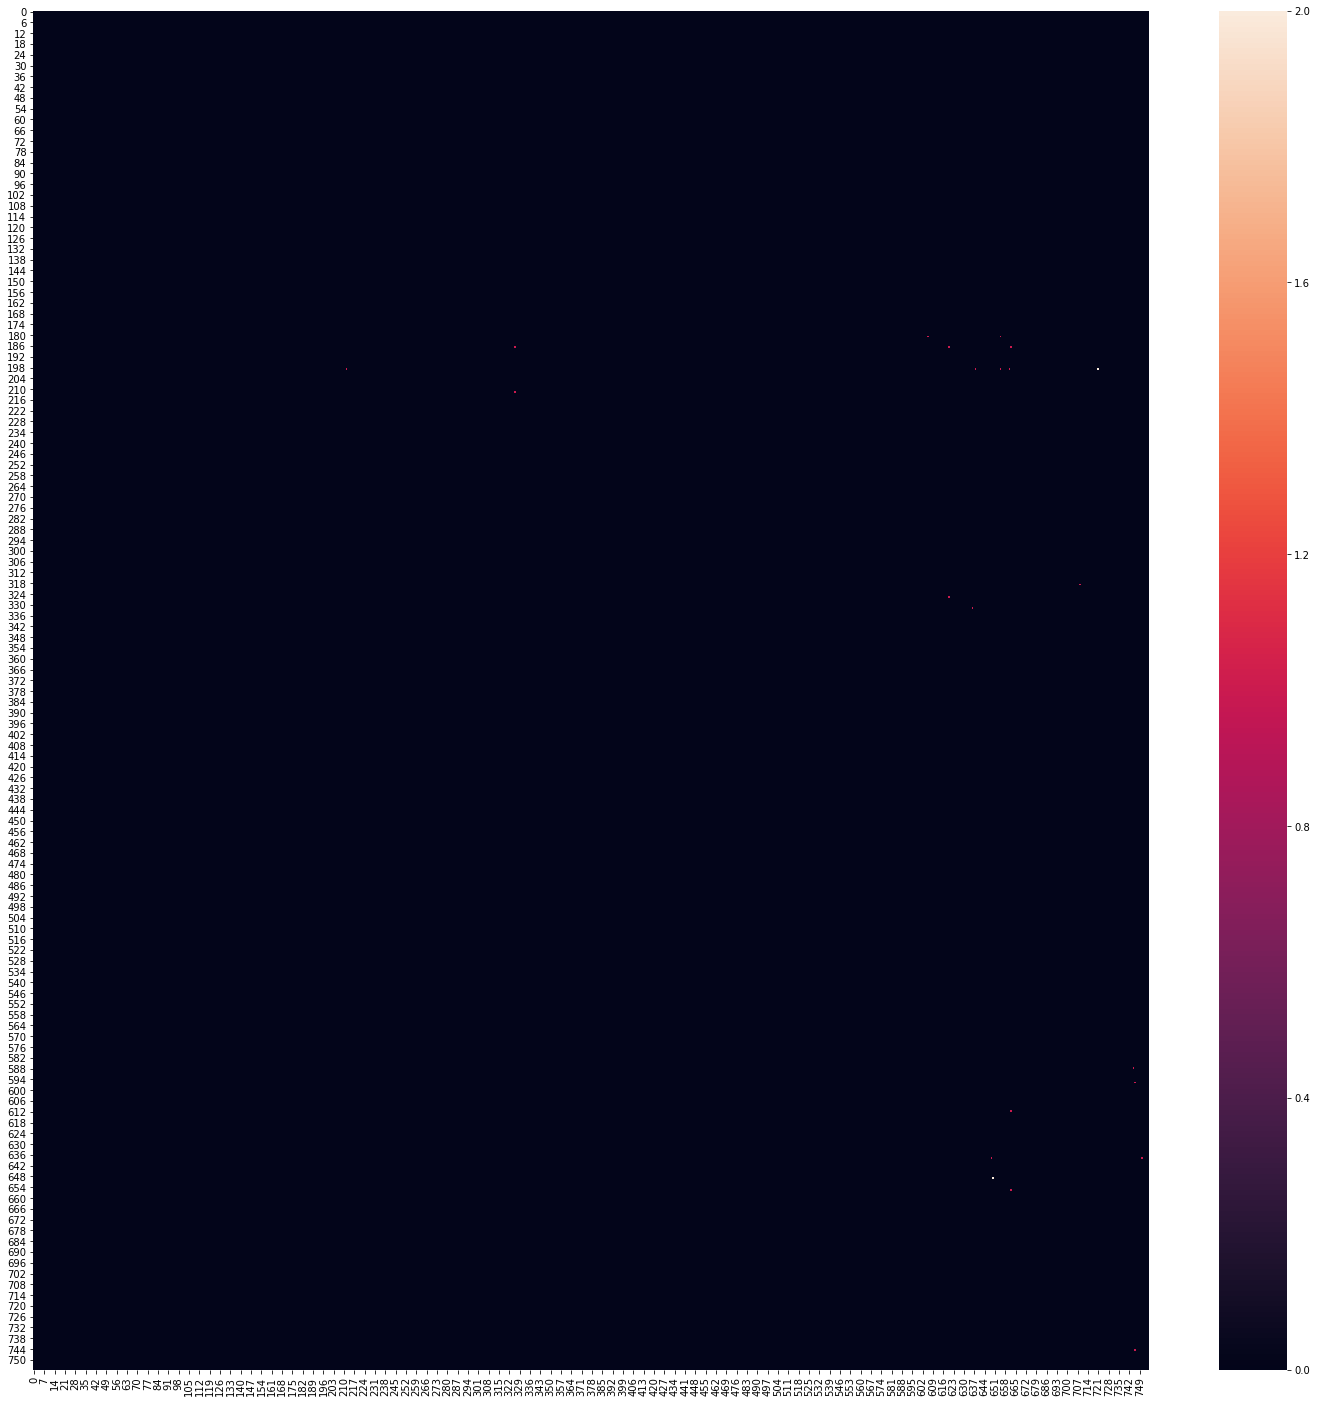

In [16]:
%matplotlib inline
plt.figure(figsize = (25,25))
sns.heatmap(toplot_rigidethanol)

In [23]:
np.where(np.sum(toplot_rigidethanol, axis = 1) !=0)[0]

array([181, 187, 199, 212, 319, 326, 332, 588, 596, 612, 638, 649, 656,
       745])

In [24]:
atoms4[np.where(np.sum(toplot_rigidethanol, axis = 1) !=0)[0]]

array([[2, 0, 5, 6],
       [2, 0, 5, 7],
       [2, 0, 6, 7],
       [8, 2, 0, 7],
       [5, 0, 6, 8],
       [8, 5, 0, 7],
       [8, 6, 0, 7],
       [2, 3, 6, 7],
       [8, 3, 2, 6],
       [2, 4, 5, 7],
       [8, 4, 2, 7],
       [5, 2, 6, 8],
       [8, 5, 2, 7],
       [6, 4, 7, 8]])

In [27]:
np.where(toplot_rigidethanol == 2)

(array([199, 649]), array([721, 650]))

In [30]:
np.save('/Users/samsonkoelle/re_full',toplot_rigidethanol)

In [32]:
replicates_rigidethanol[0].df_M

array([[[ -3.27889506,   6.2131263 ,   8.87082575],
        [  0.11098732,  11.27181241, -14.60254155]]])

In [36]:
print(replicates_rigidethanol[1].dg_M[0][199])
print(replicates_rigidethanol[1].dg_M[0][721])

[ 0.01551813 -0.9590269 ]
[0.08941549 0.94284113]


In [39]:
for i in range(25):
    print(replicates_rigidethanol[i].dg_M[0][199],replicates_rigidethanol[i].dg_M[0][721])


[ 0.86394429 -0.20426906] [-0.86007843 -0.20062521]
[ 0.01551813 -0.9590269 ] [0.08941549 0.94284113]
[-0.01109163 -0.89890001] [0.01015961 0.87711276]
[ 0.92188835 -0.24968096] [-0.94042858 -0.17734372]
[0.00176079 0.87665482] [ 0.01297762 -0.87519765]
[0.0016589  0.86334491] [-0.04105646 -0.85558979]
[0.92006339 0.21888432] [-0.93275249  0.06581958]
[-0.08524944 -0.96015891] [-0.12261085  0.95299714]
[ 0.0017804  -0.87761701] [-0.0558261   0.87272774]
[ 0.85354643 -0.30281848] [-0.90504377  0.03159231]
[-0.00680469  0.9523204 ] [-0.10110415 -0.95004418]
[-0.8543899  -0.19576627] [ 0.86185992 -0.13094396]
[0.89903853 0.17096106] [-0.89973151  0.16205232]
[-0.93823053 -0.22848914] [ 0.93427085 -0.21575108]
[0.01205382 0.89885077] [ 0.10144802 -0.88904549]
[0.00574959 0.9182862 ] [-0.06889481 -0.91846582]
[-0.07649884  0.89805337] [-0.12143813 -0.89491882]
[0.00392449 0.86792493] [ 0.0747428  -0.86345441]
[0.00947211 0.95293044] [ 0.08593253 -0.94061577]
[-0.0018529  -0.92774367] [-0.02

In [48]:
np.where((atoms4 == (5, 1, 0, 3)).all(axis=1))
np.where((atoms4 == (8, 2, 0, 4)).all(axis=1))
#[],

(array([176]),)

In [45]:
print(replicates_rigidethanol[i].dg_M[0][44])

[-0.70254904 -0.2196588 ]


In [49]:
print(replicates_rigidethanol[i].dg_M[0][176])

[ 0.00942496 -0.96494583]


In [68]:
for i in range(25):
    lr = LinearRegression(fit_intercept=False)
    ys= np.identity(2)
    xs = np.asarray([replicates_rigidethanol[i].dg_M[0][176],replicates_rigidethanol[i].dg_M[0][44]]).transpose()
    lr.fit(xs, ys)

In [70]:
ys

array([[1., 0.],
       [0., 1.]])

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr.predict(xs)

array([[ 1.00000000e+00, -2.30474809e-17],
       [ 1.41778381e-16,  1.00000000e+00]])

In [75]:
xs.transpose() @ lr.coef_

array([[ 0.72889887, -0.00363693],
       [-0.08476241,  1.37235537]])

In [74]:
lr.coef_

array([[ 0.32303142, -1.41905459],
       [-1.03317244, -0.0138604 ]])

In [25]:
np.sum(toplot_rigidethanol, axis = 1)[np.where(np.sum(toplot_rigidethanol, axis = 1) !=0)[0]]

array([2., 3., 6., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1.])

In [31]:
atoms4[np.where(np.sum(toplot_rigidethanol, axis = 1) !=0)[0]]

array([[2, 0, 5, 6],
       [2, 0, 5, 7],
       [2, 0, 6, 7],
       [8, 2, 0, 7],
       [5, 0, 6, 8],
       [8, 5, 0, 7],
       [8, 6, 0, 7],
       [2, 3, 6, 7],
       [8, 3, 2, 6],
       [2, 4, 5, 7],
       [8, 4, 2, 7],
       [5, 2, 6, 8],
       [8, 5, 2, 7],
       [6, 4, 7, 8]])

In [21]:
(-np.sum(toplot_rigidethanol, axis = 1)).argsort()

array([199, 187, 649, 638, 181, 656, 332, 319, 596, 588, 326, 212, 612,
       745, 479, 503, 504, 505, 506, 507, 508, 509, 484, 478, 510, 511,
       512, 513, 477, 514, 515, 502, 501, 500, 499, 485, 486, 487, 488,
       489, 482, 490, 483, 491, 493, 494, 481, 480, 496, 497, 498, 492,
       495,   0, 517, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550,
       551, 552, 553, 554, 555, 556, 557, 558, 559, 540, 516, 539, 537,
       518, 476, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 538, 519, 474, 560, 407, 408, 409,
       410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
       423, 424, 425, 406, 405, 404, 403, 383, 384, 385, 386, 387, 388,
       389, 390, 391, 426, 392, 394, 395, 396, 397, 398, 399, 400, 401,
       402, 393, 427, 428, 429, 454, 455, 456, 457, 458, 459, 460, 461,
       462, 453, 463, 465, 466, 467, 468, 469, 470, 471, 472, 473, 464,
       475, 452, 450, 430, 431, 432, 433, 434, 435, 436, 437, 43

In [17]:
def get_all_atoms_4(natoms):
    combos = np.asarray(list(itertools.combinations(list(range(natoms)), 4)))
    nc = combos.shape[0]
    tor_mat = np.zeros((nc, 6, 4), dtype=int)
    for c in range(nc):
        tor_mat[c] = np.asarray([combos[c][[0, 1, 2, 3]],
                                 combos[c][[1, 0, 2, 3]],
                                 # combos[c][[0,2,1,3]],
                                 combos[c][[3, 1, 0, 2]],
                                 combos[0][[2, 1, 3, 0]],
                                 # combos[0][[1,2,3,0]],
                                 combos[0][[0, 3, 2, 1]],
                                 combos[0][[1, 0, 3, 2]]])
    output = np.reshape(tor_mat, (nc * 6, 4))
    return (output, output.shape[0])

In [18]:
import itertools
atoms4= get_all_atoms_4(9)[0]

In [7]:

toplot_toluene = get_toplot(supports_toluene, 30,1)

toplot_rigidethanol = get_toplot(supports_rigidethanol, 12,2)

toplot_ethanol = get_toplot(supports_ethanol, 12,2)

toplot_malonaldehyde = get_toplot(supports_malonaldehyde, 12,2)

In [8]:
#rt = replicates_toluene[i]

In [9]:
# coeffs = replicates_ethanol[i].coeffs
# dim = 2

In [10]:
#     selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

#     if len(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]) > 0:
#         selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

#         selected_functions_at_selection_lambda = selected_functions[1][np.where(selected_functions[0] == selection_lambda)[0]]


In [11]:
# def get_support(coeffs, dim):
#     selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

#     selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

#     selected_functions_at_selection_lambda = selected_functions[1][
#         np.where(selected_functions[0] == selection_lambda)[0]]

#     return (selected_functions_at_selection_lambda)

In [12]:
replicates_toluene[0].dg_M.shape

(100, 30, 1)

In [11]:
def plot_watch(to_plot, p):
    #fig, ax = plt.subplots(figsize = (15,15))
    %matplotlib inline
    
    #fig, ax = plt.subplots(figsize = (15,15))
    theta = np.linspace(0, 2*np.pi, 10000)
    cmap = plt.get_cmap('twilight_shifted',p)
    
    angles = np.linspace(0, 2*np.pi, p+1)
    
    radius = 1.

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)

    figure, axes = plt.subplots(figsize = (15,15))

    #axes.plot(a, b, color= 'gray')
    axes.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

    #for i in range(to_plot.shape)
    if len(to_plot.shape) > 1:
        totes = np.sum(to_plot, axis = 0)
    else:
        totes = to_plot
        
    for j in range(p):
        print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
        axes.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
        axes.text( x = 1.1*np.cos(angles[j]),
                  y = 1.1*np.sin(angles[j]),
                  s = r"$g_{{{}}}$".format(j),color=cmap.colors[j],
                  fontdict = {'fontsize' : 40},
                  horizontalalignment='center',
         verticalalignment='center')



        axes.text( x = .9*np.cos(angles[j]),y = .9*np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 30},
                  horizontalalignment='center',
         verticalalignment='center')



    for j in range(p):
        axes.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'o', s = 100*totes[j] )

    if len(to_plot.shape) > 1:
        for i in range(p):
            for j in range(p):

                #point1 = [1, 2]
                #point2 = [3, 4]

                x_values = [np.cos(angles[j]), np.cos(angles[i])]
                #gather x-values

                y_values = [np.sin(angles[j]), np.sin(angles[i])]
                #gather y-values

                plt.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

                if to_plot[i,j] > 0 :
                    axes.text( x = np.mean(x_values),
                      y = np.mean(y_values),
                      s = str(to_plot[i,j] / nreps),
                      fontdict = {'fontsize' : 20})#,
                  #horizontalalignment='left',
                # verticalalignment='bottom')

                #axes.axline((x1, y1), (x2, y2))
    axes.set_aspect(1)
    axes.set_axis_off()

In [ ]:
plot_watch(toplot_rigidethanol, 756)

1.0 0.0
0.9999654630763769 0.008310995996097024
0.9998618546911057 0.016621417919726152
0.9996891820008162 0.024930691738072875
0.9994474569326756 0.03323824349762674
0.9991366961835642 0.041543499363826515
0.9987569212189223 0.04984588566069716
0.9983081582712682 0.05814482891047583
0.997790438338385 0.06643975587322418
0.9972037971811801 0.07473009358642425
0.9965482753212155 0.08301526940455524
0.9958239180379078 0.0912947110386483
0.9950307753654014 0.09956784659581666
0.9941689020891121 0.10783410461875863
0.993238357741943 0.11609291412523023
0.9922392066001721 0.12434370464748516
0.9911715176790128 0.13258590627167927
0.9900353647278465 0.14081894967723654
0.9888308262251285 0.14904226617617444
0.9875579853729676 0.15725528775238523
0.9862169300913782 0.16545744710087118
0.984807753012208 0.17364817766693033
0.9833305514727394 0.18182691368529075
0.9817854275089658 0.18999309021918998
0.9801724878485438 0.19814614319939758
0.9784918439034213 0.2062855094631774
0.9767436117621412

-0.3341985493931875 0.9425026947353993
-0.3420201433256687 0.9396926207859084
-0.34981811261101475 0.936817638651871
-0.3575919186134861 0.9338779469193638
-0.3653410243663949 0.9308737486442042
-0.3730648946091938 0.9278052513379255
-0.3807629958244495 0.9246726669534415
-0.3884347962746947 0.9214762118704076
-0.3960797660391568 0.918216106880274
-0.40369737705036224 0.9148925771710347
-0.4112871031306114 0.9115058523116732
-0.41884842002832473 0.908056166236305
-0.4263808054542537 0.9045437572280193
-0.43388373911755806 0.9009688679024191
-0.44135670276174394 0.897331745190864
-0.44879918020046217 0.8936326403234123
-0.456210657353163 0.8898718088114685
-0.4635906222806057 0.8860495104301344
-0.4709385652202202 0.8821660092002641
-0.4782539786213183 0.8782215733702284
-0.4855363571801518 0.8742164753973858
-0.4927851978748174 0.8701509919292612
-0.4999999999999998 0.8660254037844388
-0.507180265201559 0.8618399959331641
-0.5143254975109535 0.8575950574776596
-0.5214352033794979 0.853

-0.844506011066308 -0.5355460739029584
-0.8400259231507715 -0.5425462638657593
-0.8354878114129365 -0.549508978070806
-0.8308919893176397 -0.556433735576641
-0.8262387743159949 -0.5633200580636221
-0.8215284878234639 -0.5701674698669617
-0.8167614551976569 -0.5769754980095826
-0.8119380057158567 -0.5837436722347896
-0.8070584725522763 -0.5904715250387497
-0.802123192755044 -0.597158591702786
-0.7971325072229226 -0.6038044103254772
-0.7920867606817623 -0.610408521854563
-0.7869863016606891 -0.6169704701186524
-0.7818314824680299 -0.6234898018587334
-0.7766226591669785 -0.6299660667594813
-0.7713601915509998 -0.6363988174803634
-0.7660444431189781 -0.6427876096865393
-0.7606757810501086 -0.6491320020795519
-0.7552545761785349 -0.6554315564278103
-0.7497812029677344 -0.6616858375968592
-0.7442560394846519 -0.6678944135794372
-0.7386794673735858 -0.6740568555253151
-0.7330518718298265 -0.6801727377709192
-0.727373641573049 -0.6862416378687334
-0.7216451688204623 -0.6922631366164794
-0.7158

0.807058472552276 -0.5904715250387499
0.8119380057158565 -0.5837436722347898
0.8167614551976567 -0.5769754980095829
0.821528487823464 -0.5701674698669617
0.8262387743159949 -0.563320058063622
0.8308919893176399 -0.5564337355766409
0.8354878114129365 -0.5495089780708059
0.8400259231507715 -0.5425462638657592
0.8445060110663075 -0.535546073902959
0.8489277657026371 -0.5285088917124561
0.8532908816321554 -0.5214352033794986
0.8575950574776592 -0.5143254975109541
0.8618399959331637 -0.5071802652015597
0.8660254037844384 -0.5000000000000004
0.8701509919292607 -0.49278519787481806
0.8742164753973855 -0.4855363571801525
0.8782215733702283 -0.4782539786213186
0.8821660092002639 -0.47093856522022043
0.8860495104301342 -0.46359062228060594
0.8898718088114684 -0.45621065735316324
0.8936326403234122 -0.4487991802004624
0.8973317451908638 -0.4413567027617442
0.900968867902419 -0.4338837391175583
0.9045437572280192 -0.426380805454254
0.9080561662363049 -0.418848420028325
0.9115058523116731 -0.411287

KeyboardInterrupt: 

1.0 0.0
0.9781476007338057 0.20791169081775931
0.9135454576426009 0.40673664307580015
0.8090169943749475 0.5877852522924731
0.6691306063588583 0.7431448254773941
0.5000000000000001 0.8660254037844386
0.30901699437494745 0.9510565162951535
0.10452846326765367 0.9945218953682733
-0.10452846326765333 0.9945218953682734
-0.30901699437494734 0.9510565162951536
-0.4999999999999998 0.8660254037844388
-0.6691306063588579 0.7431448254773945
-0.8090169943749473 0.5877852522924732
-0.9135454576426008 0.40673664307580043
-0.9781476007338056 0.20791169081775973
-1.0 1.2246467991473532e-16
-0.9781476007338057 -0.20791169081775907
-0.9135454576426011 -0.4067366430757998
-0.8090169943749475 -0.587785252292473
-0.6691306063588585 -0.743144825477394
-0.5000000000000004 -0.8660254037844384
-0.30901699437494756 -0.9510565162951535
-0.10452846326765423 -0.9945218953682733
0.104528463267653 -0.9945218953682734
0.30901699437494723 -0.9510565162951536
0.4999999999999993 -0.866025403784439
0.6691306063588578 -

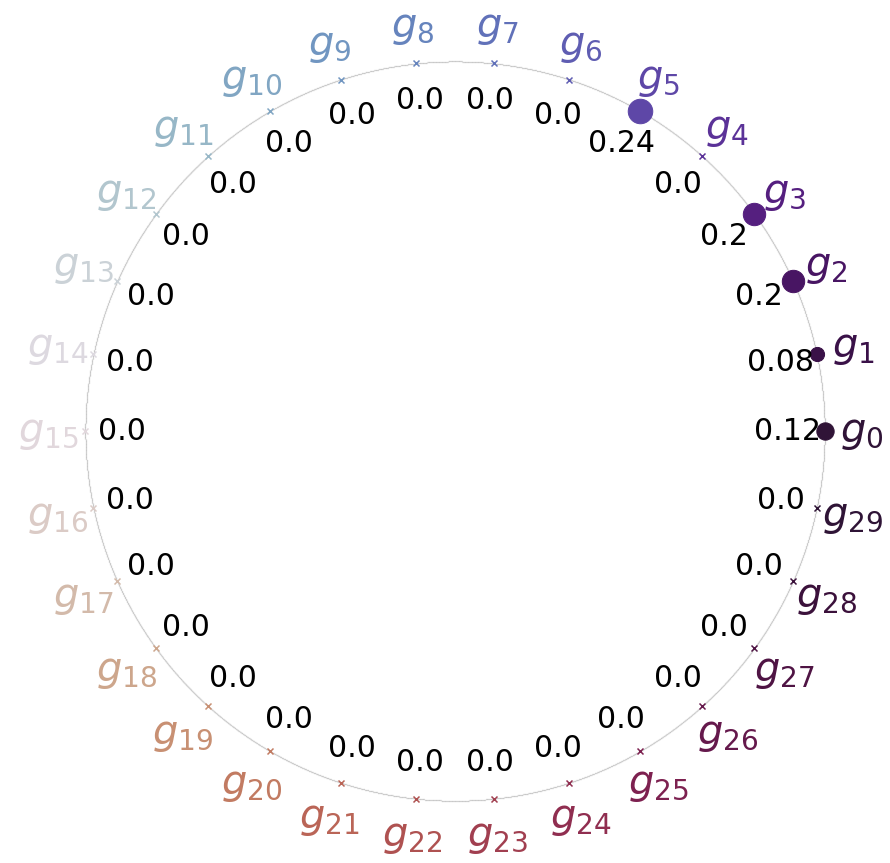

In [16]:
plot_watch(toplot_toluene, 30)

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


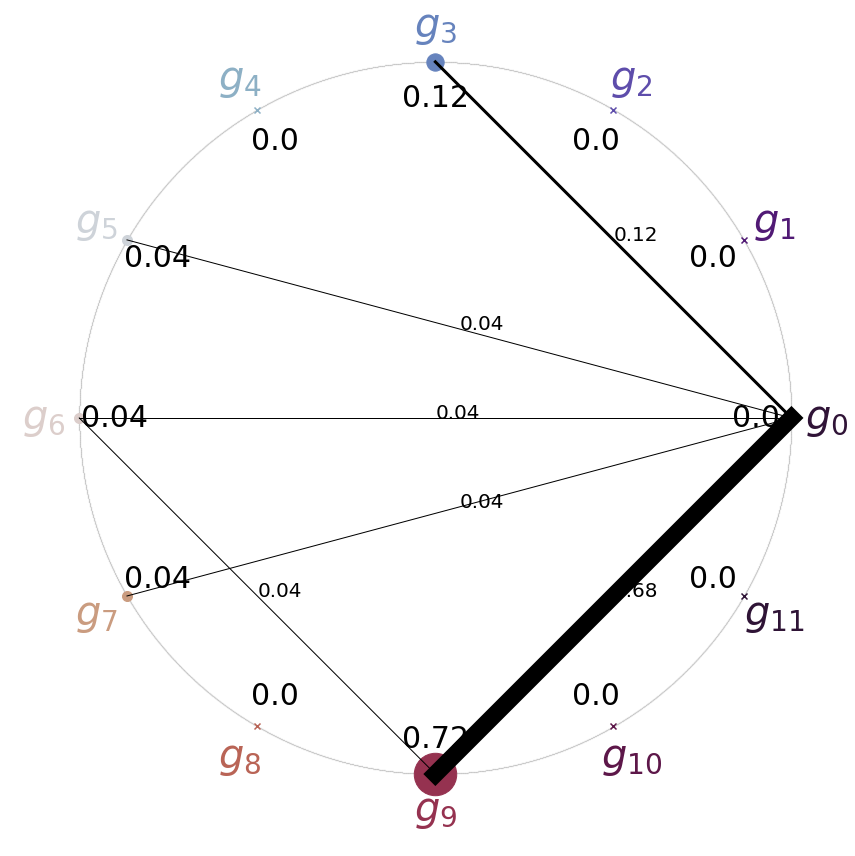

In [17]:
plot_watch(toplot_ethanol, 12)

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


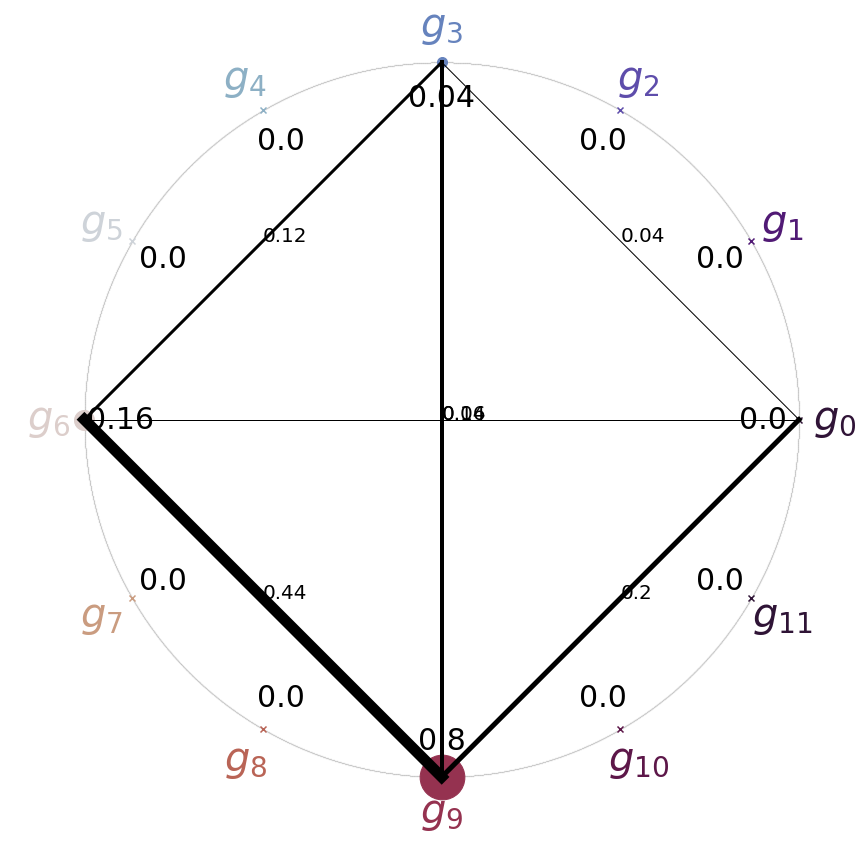

In [18]:
plot_watch(toplot_rigidethanol, 12)

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


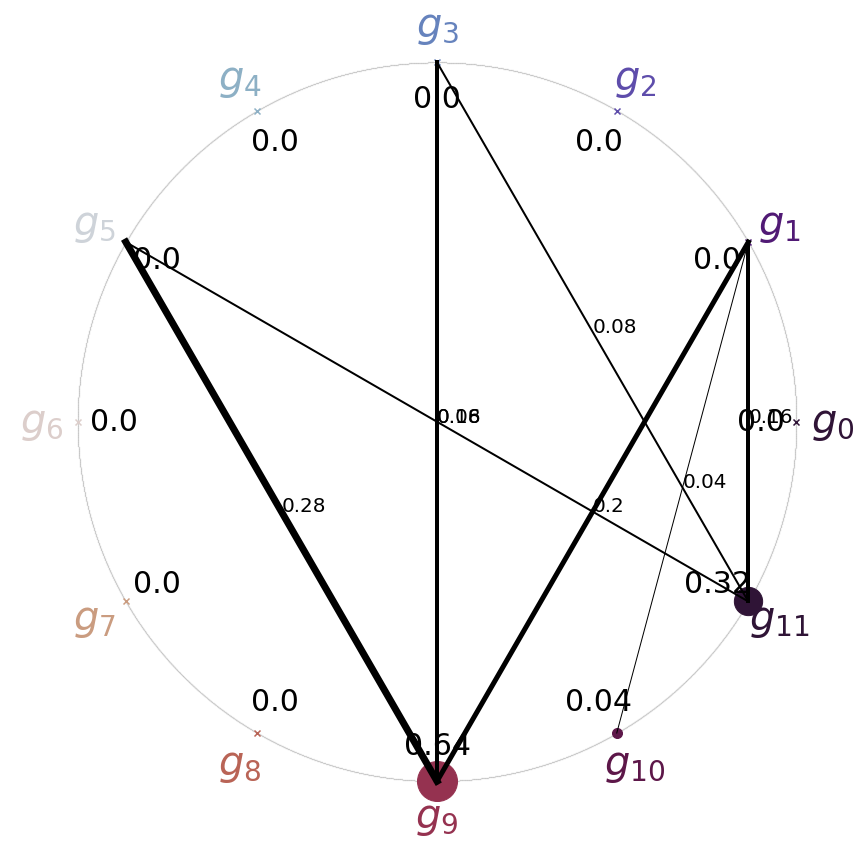

In [19]:
plot_watch(toplot_malonaldehyde, 12)

In [14]:


def get_penalty(coeffs):
    pen = np.sum(np.linalg.norm(coeffs, axis=1))
    return (pen)


def cosine_similarity(a, b):
    output = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return (output)


# def get_cosines(self, dg):
def get_cosines(dg):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]

    coses = np.zeros((n, p, p))
    for i in range(n):
        for j in range(p):
            for k in range(p):
                coses[i, j, k] = cosine_similarity(dg[i, j, :], dg[i, k,
                                                                :])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    # cos_summary = np.abs(coses).sum(axis = 0) / n
    cos_summary = np.sum(coses ** 2, axis=0) / n
    return (cos_summary)


In [15]:
import matplotlib.pyplot as plt

In [16]:
from pylab import rcParams
def width(p,w):
    if p > 1.:
        output = 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)
    else:
        output = w
    return(output)


In [17]:
def plot_watch_custom(to_plot, p, ax,colors):
    #fig, ax = plt.subplots(figsize = (15,15))
    #%matplotlib inline
    
    #fig, ax = plt.subplots(figsize = (15,15))
    theta = np.linspace(0, 2*np.pi, 10000)
    cmap = plt.get_cmap('twilight_shifted',p)
    
    angles = np.linspace(0, 2*np.pi, p+1)
    
    radius = 1.

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)

    #figure, axes = plt.subplots(figsize = (15,15))

    #axes.plot(a, b, color= 'gray')
    ax.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

    #for i in range(to_plot.shape)
    if len(to_plot.shape) > 1:
        totes = np.sum(to_plot, axis = 0)
    else:
        totes = to_plot
        
    for j in range(p):
        print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
        ax.text( x = 1.1*np.cos(angles[j]),
                  y = 1.1*np.sin(angles[j]),
                  s = r"$g_{{{}}}$".format(j),color=colors[j],#cmap.colors[j],
                  fontdict = {'fontsize' : 70},
                  horizontalalignment='center',
         verticalalignment='center')



        ax.text( x = .9*np.cos(angles[j]),y = .9*np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 40},
                  horizontalalignment='center',
         verticalalignment='center')



    for j in range(p):
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=colors[j], marker  = 'o', s = 200*totes[j] )

    if len(to_plot.shape) > 1:
        for i in range(p):
            for j in range(p):

                #point1 = [1, 2]
                #point2 = [3, 4]

                x_values = [np.cos(angles[j]), np.cos(angles[i])]
                #gather x-values

                y_values = [np.sin(angles[j]), np.sin(angles[i])]
                #gather y-values

                ax.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

                if to_plot[i,j] > 0 :
                    ax.text( x = np.mean(x_values),
                      y = np.mean(y_values),
                      s = str(to_plot[i,j] / nreps),
                      fontdict = {'fontsize' : 40})#,
                  #horizontalalignment='left',
                # verticalalignment='bottom')

                #axes.axline((x1, y1), (x2, y2))
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_title(r"$\omega = 25$")

In [229]:
with open('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/swiss_spectral.pkl' ,
        'rb') as output:
    replicates_swiss_spectral = pickle.load(output)
    
with open('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/swiss_isomap.pkl' ,
        'rb') as output:
    replicates_swiss_isomap = pickle.load(output)

with open('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/swiss_internal.pkl' ,
        'rb') as output:
    replicates_swiss_internal = pickle.load(output)
with open('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/swiss_ltsa.pkl' ,
        'rb') as output:
    replicates_swiss_ltsa = pickle.load(output)


In [25]:

def plot_reg_path_ax_lambdasearch_customcolors(axes, coeffs, xaxis,fig, colors):
    p = coeffs.shape[3]
    q = coeffs.shape[1]
    gnames = np.asarray(list(range(p)), dtype=str)

    # xlabel = r"$\displaystyle \lambda$"
    # ylabel = r"$\displaystyle \|\hat \beta_{j}\|_2$"
    rcParams['axes.titlesize'] = 30
    plt.rc('text', usetex=True)

    # maxes = np.zeros(q)
    # for k in range(q):
    #     maxes[k] = np.linalg.norm(coeffs[:, k, :, :], axis=1).max()
    # normax = maxes.max()
    normax = np.sqrt(np.sum(np.sum(np.sum(coeffs ** 2, axis=1), axis=1), axis=1).max())

    for k in range(q):
        for j in range(p):
            toplot = np.linalg.norm(coeffs[:, k, :, j], axis=1)
            w = .15
            widths = np.asarray([width(xaxis[i], w) for i in range(len(xaxis))])
            # axes[k+1].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
            axes[k + 1].plot(xaxis, toplot, 'go--', linewidth=5, markersize=0, alpha=1.,
                             color=colors[j], label=gnames[j])
    for j in range(p):
        toplot = np.linalg.norm(np.linalg.norm(coeffs[:, :, :, j], axis=2), axis=1)
        # axes[0].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
        axes[0].plot(xaxis, toplot, 'go--', linewidth=5, markersize=0, alpha=1.,
                     color=colors[j], label=gnames[j])

    kkk = xaxis.copy()
    kkk.sort()

    # xupperindex = np.min(np.where(np.sum(np.sum(np.sum(coeffs**2, axis = 1), axis = 1), axis = 1) ==0)[0])

    for k in range(1 + q):
        axes[k].tick_params(labelsize=50)
        axes[k].set_xscale('symlog')
        axes[k].set_yscale('symlog')
        axes[k].set_ylim(bottom=0, top=normax)
        # axes[k].set_xlim(left = 0, right = xaxis[xupperindex])
        if (k == 0):
            tixx = np.hstack(
                [np.asarray([0]), 10 ** np.linspace(math.floor(np.log10(normax)), math.floor(np.log10(normax)) + 1, 2)])
        if k != 0:
            # axes[k].set_yticks(tixx)
            axes[k].set_yticklabels([])
        if k != q:
            axes[k+1].set_title(r"$\phi_{{{}}}$".format(k+1), fontsize = 50)
            #axes[k + 1].set_title(r"$\phi_{{{}}}$.format(k)")
        if k == 0:
            axes[k].set_title("Combined", fontdict={'fontsize': 50})
    for k in range(1 + q):
        axes[k].grid(True, which="both", alpha=True)
        axes[k].set_xlabel(r"$\lambda$", fontsize = 50)
        
    axes[0].set_ylabel(r"$\|\beta\|$", fontsize = 50)
        
    handles, labels = axes[0].get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    # fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=50)
    # fig.text(0.05, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=60)
    fig.subplots_adjust(right=0.75)
    leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
    leg_ax.axis('off')
    leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200 / p})
    # leg.set_title('Torsion', prop={'size': Function})
    for l in leg.get_lines():
        l.set_alpha(1)
    # fig.savefig(filename + 'beta_paths_n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(
    #    nreps))



In [19]:
from matplotlib import rcParams

def width(p,w):
    if p > 1.:
        output = 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)
    else:
        output = w
    return(output)
import math
from collections import OrderedDict

<IPython.core.display.Javascript object>


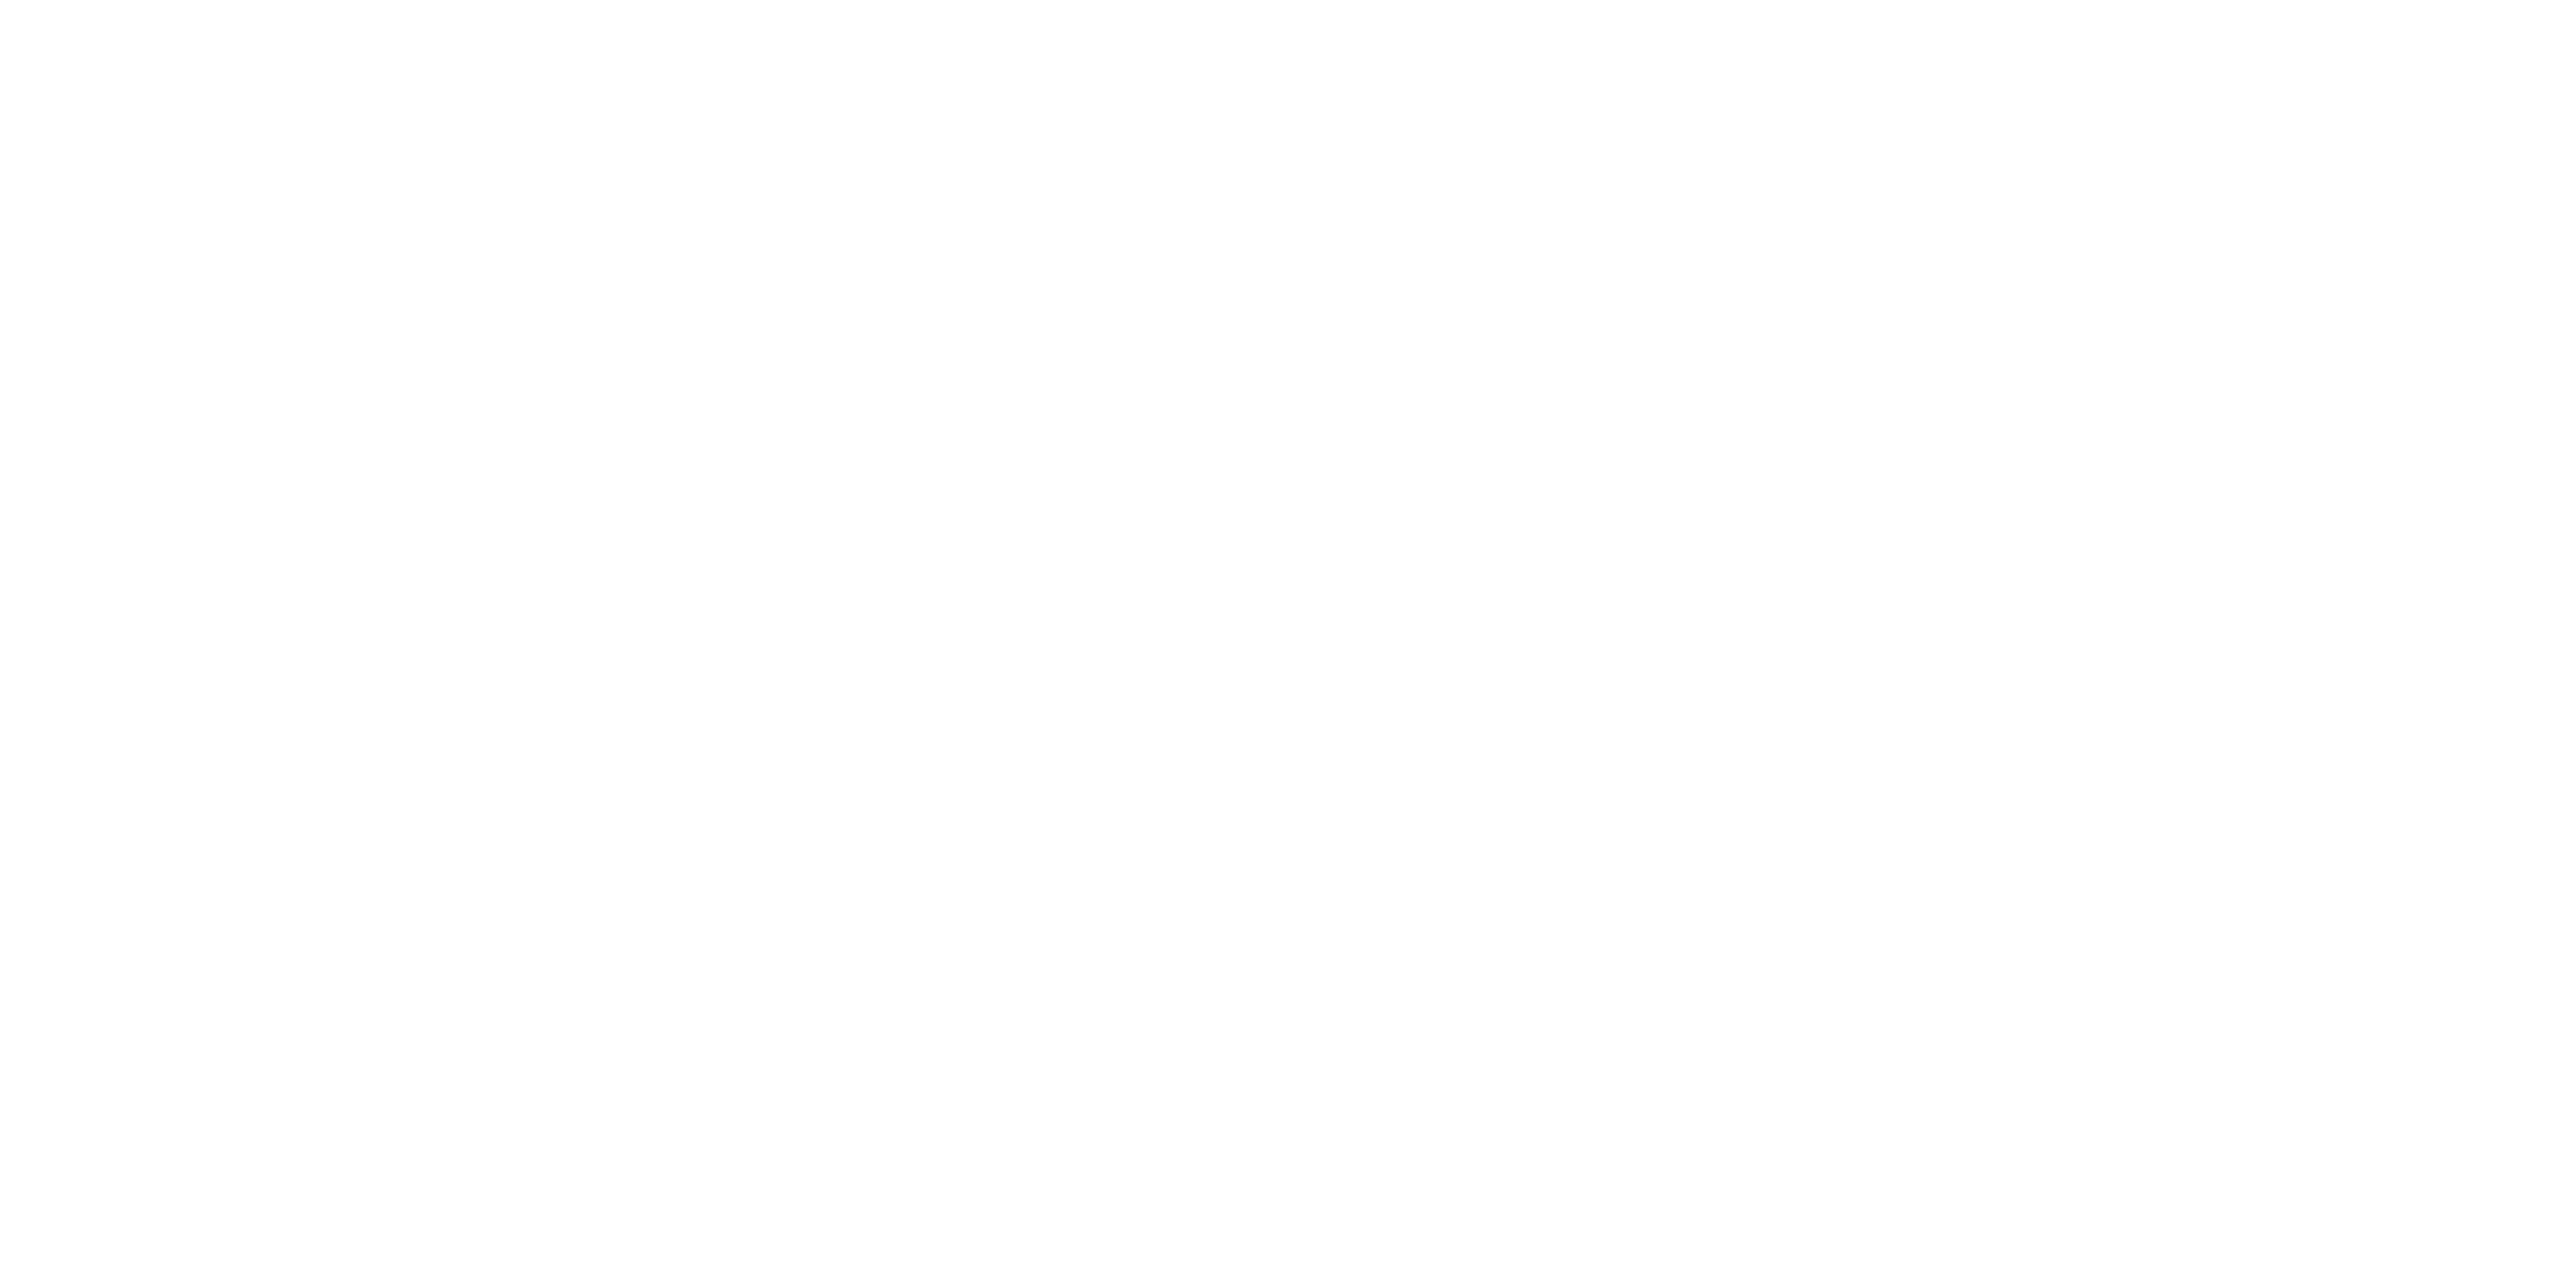

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'folder' is not defined

<IPython.core.display.Javascript object>


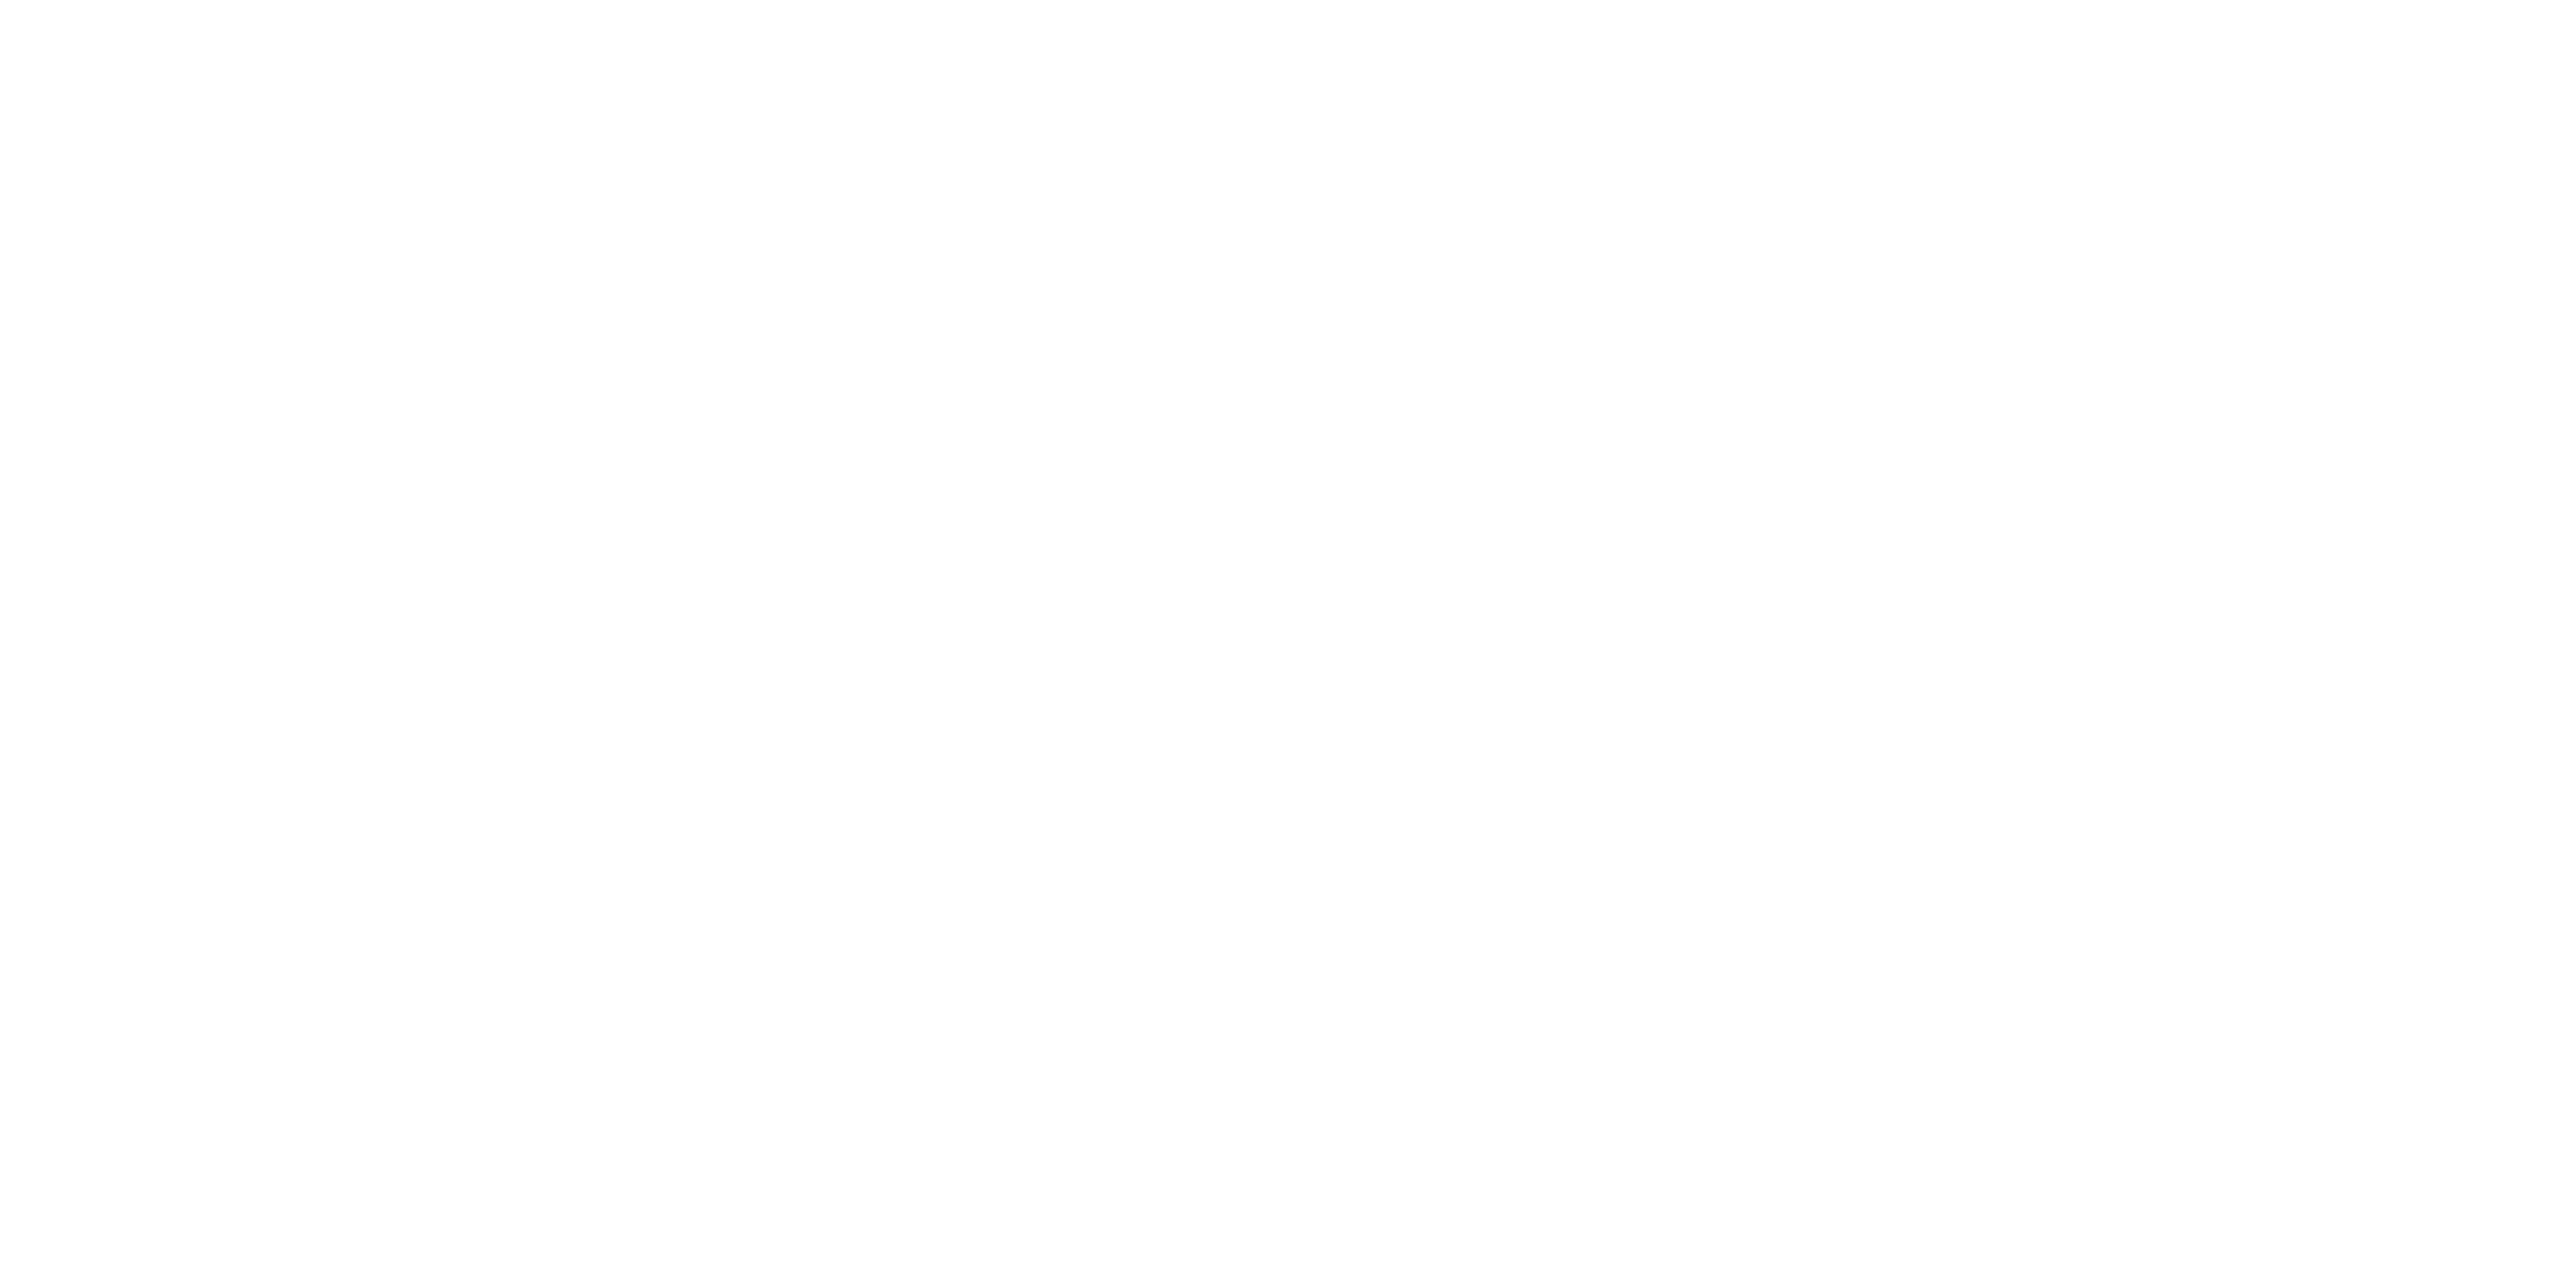

In [113]:
%matplotlib notebook
colors = np.hstack([np.repeat('red',1), np.repeat('blue',1),np.repeat('black',49)])
i = 0
m=  2
nreps = 2
nsel = 5
fig, axes_all = plt.subplots(4, 4,figsize=(15 * 4, 15*nreps))
fig.suptitle('Regularization paths')
plot_reg_path_ax_lambdasearch_customcolors(axes_all[0], replicates_swiss_internal[i].coeffs, replicates_swiss_internal[i].lambdas_plot * np.sqrt(m * nsel), fig,colors)
plot_reg_path_ax_lambdasearch_customcolors(axes_all[1], replicates_swiss_spectral[i].coeffs, replicates_swiss_spectral[i].lambdas_plot * np.sqrt(m * nsel), fig,colors)
plot_reg_path_ax_lambdasearch_customcolors(axes_all[2], replicates_swiss_isomap[i].coeffs, replicates_swiss_isomap[i].lambdas_plot * np.sqrt(m * nsel), fig,colors)
plot_reg_path_ax_lambdasearch_customcolors(axes_all[3], replicates_swiss_ltsa[i].coeffs, replicates_swiss_ltsa[i].lambdas_plot * np.sqrt(m * nsel), fig,colors)
fig.savefig(folder + '/swiss_combined2')


In [221]:
colors = np.hstack([np.repeat('red',1), np.repeat('blue',1),np.repeat('black',49)])


In [222]:
swiss_ltsa =np.load('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/swiss_ltsa.npy')
swiss_internal = np.load('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/swiss_internal.npy')
swiss_isomap = np.load('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/swiss_isomap.npy')
swiss_spectral = np.load('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/swiss_spectral.npy')

In [223]:
%matplotlib inline

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


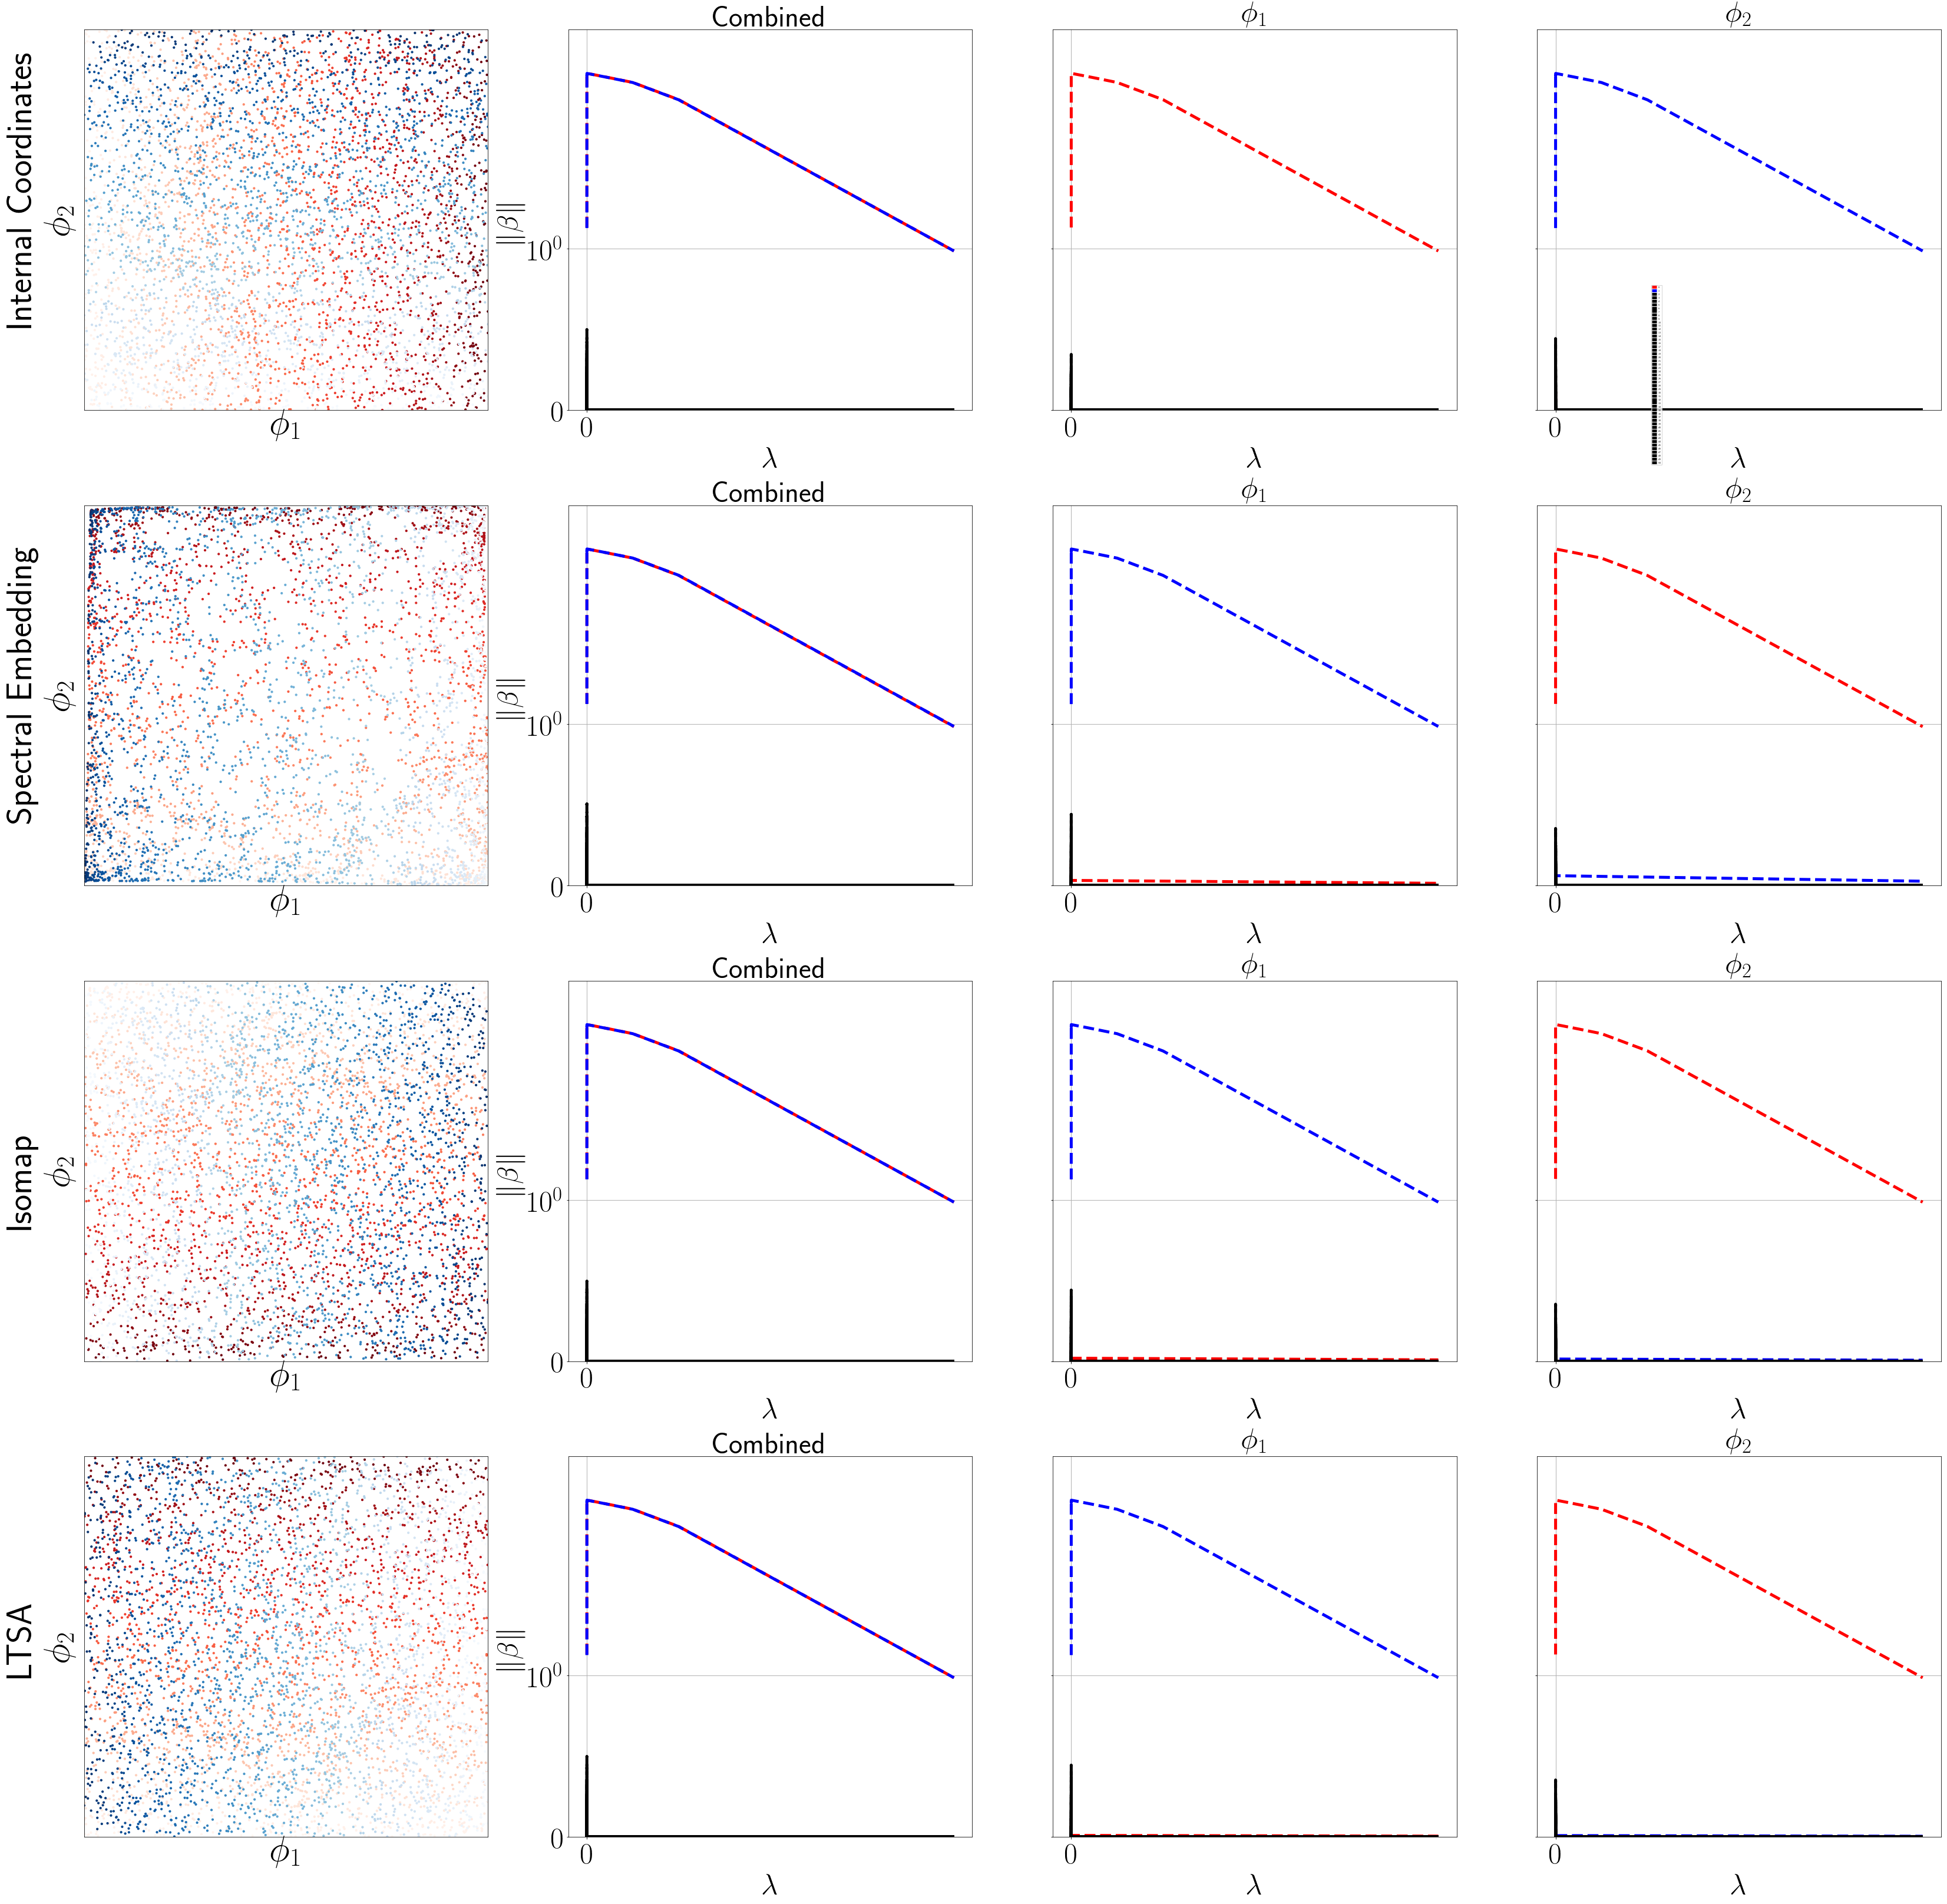

In [230]:
fig, axes_all = plt.subplots(4, 4,figsize=(45,45) )#15*nreps))
inds1 = np.asarray(list(range(2500)))*2
inds2 = np.asarray(list(range(2500)))*2 + 1
axes_all[0,0].scatter(swiss_internal[inds1,0],swiss_internal[inds1,1], s = 10, alpha = 1, c = swiss_internal[inds1,0], cmap = 'Reds')
axes_all[0,0].scatter(swiss_internal[inds2,0],swiss_internal[inds2,1], s =10, alpha = 1, c = swiss_internal[inds2,1], cmap = 'Blues')
axes_all[0,0].set_xlim(swiss_internal[:,0].min(), swiss_internal[:,0].max())
axes_all[0,0].set_ylim(swiss_internal[:,1].min(), swiss_internal[:,1].max())
axes_all[0,0].set_xticks([])
axes_all[0,0].set_yticks([])
#axes_all[0,0].set_ylabel(r'$\phi_2$')
#axes_all[0,0].set_xlabel(r'$\phi_1$')
axes_all[0,0].set_xlabel(r'$\phi_1$', fontsize = 60)
axes_all[0,0].set_ylabel(r'$\phi_2$', fontsize = 60)
fig.text(-0.01, 0.9, 'Internal Coordinates', ha='center', va='center', rotation='vertical', fontsize = 60)


axes_all[1,0].scatter(swiss_spectral[inds1,0],swiss_spectral[inds1,1], s = 10, alpha = 1, c = swiss_internal[inds1,0], cmap = 'Reds')
axes_all[1,0].scatter(swiss_spectral[inds2,0],swiss_spectral[inds2,1], s =10, alpha = 1, c = swiss_internal[inds2,1], cmap = 'Blues')
axes_all[1,0].set_xlim(swiss_spectral[:,0].min(), swiss_spectral[:,0].max())
axes_all[1,0].set_ylim(swiss_spectral[:,1].min(), swiss_spectral[:,1].max())
axes_all[1,0].set_xticks([])
axes_all[1,0].set_yticks([])
#axes_all[1,0].set_ylabel(r'$\phi_2$')
#axes_all[1,0].set_xlabel(r'$\phi_1$')
axes_all[1,0].set_xlabel(r'$\phi_1$', fontsize = 60)
axes_all[1,0].set_ylabel(r'$\phi_2$', fontsize = 60)
#secax = axes_all[1,0].secondary_yaxis('left')# functions=(deg2rad, rad2deg))
#secax.set_text(x 'Spectral Embedding', labelpad = 20,fontsize = 60)
#axes_all[1,0].set_ylabel(r'$\phi_2$', fontsize = 60, labelpad = 20)
fig.text(-0.01, 0.64, 'Spectral Embedding', ha='center', va='center', rotation='vertical', fontsize = 60)

axes_all[2,0].scatter(swiss_isomap[inds1,0],swiss_isomap[inds1,1], s = 10, alpha = 1, c = swiss_internal[inds1,0], cmap = 'Reds')
axes_all[2,0].scatter(swiss_isomap[inds2,0],swiss_isomap[inds2,1], s =10, alpha = 1, c = swiss_internal[inds2,1], cmap = 'Blues')
axes_all[2,0].set_xlim(swiss_isomap[:,0].min(), swiss_isomap[:,0].max())
axes_all[2,0].set_ylim(swiss_isomap[:,1].min(), swiss_isomap[:,1].max())
axes_all[2,0].set_xticks([])
axes_all[2,0].set_yticks([])
#axes_all[2,0].set_ylabel(r'$\phi_2$')
#axes_all[2,0].set_xlabel(r'$\phi_1$')
axes_all[2,0].set_xlabel(r'$\phi_1$', fontsize = 60)
axes_all[2,0].set_ylabel(r'$\phi_2$', fontsize = 60)
fig.text(-0.01, 0.38, 'Isomap', ha='center', va='center', rotation='vertical', fontsize = 60)

axes_all[3,0].scatter(swiss_ltsa[inds1,0],swiss_ltsa[inds1,1], s = 10, alpha = 1, c = swiss_internal[inds1,0], cmap = 'Reds')
axes_all[3,0].scatter(swiss_ltsa[inds2,0],swiss_ltsa[inds2,1], s =10, alpha = 1, c = swiss_internal[inds2,1], cmap = 'Blues')
axes_all[3,0].set_xlim(swiss_ltsa[:,0].min(), swiss_ltsa[:,0].max())
axes_all[3,0].set_ylim(swiss_ltsa[:,1].min(), swiss_ltsa[:,1].max())
axes_all[3,0].set_xticks([])
axes_all[3,0].set_yticks([])
#axes_all[3,0].set_ylabel(r'$\phi_2$')
axes_all[3,0].set_xlabel(r'$\phi_1$', fontsize = 60)
axes_all[3,0].set_ylabel(r'$\phi_2$', fontsize = 60)
fig.text(-0.01, 0.14, 'LTSA', ha='center', va='center', rotation='vertical', fontsize = 60)

#axes_all[1,0].plot(swiss_spectral)
#axes_all[2,0].plot(swiss_isomap)
#axes_all[3,0].plot(swiss_ltsa)

plot_reg_path_ax_lambdasearch_customcolors(axes_all[0][1:], replicates_swiss_internal[0].coeffs, replicates_swiss_internal[0].lambdas_plot * np.sqrt(m * nsel), fig,colors)
plot_reg_path_ax_lambdasearch_customcolors(axes_all[1][1:], replicates_swiss_spectral[0].coeffs, replicates_swiss_spectral[0].lambdas_plot * np.sqrt(m * nsel), fig,colors)
plot_reg_path_ax_lambdasearch_customcolors(axes_all[2][1:], replicates_swiss_isomap[0].coeffs, replicates_swiss_isomap[0].lambdas_plot * np.sqrt(m * nsel), fig,colors)
plot_reg_path_ax_lambdasearch_customcolors(axes_all[3][1:], replicates_swiss_ltsa[0].coeffs, replicates_swiss_ltsa[0].lambdas_plot * np.sqrt(m * nsel), fig,colors)

fig.tight_layout()

plt.savefig('swissgood2', bbox_inches = "tight")

In [186]:
rs = replicates_swiss_internal[i]

KeyError: 24

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


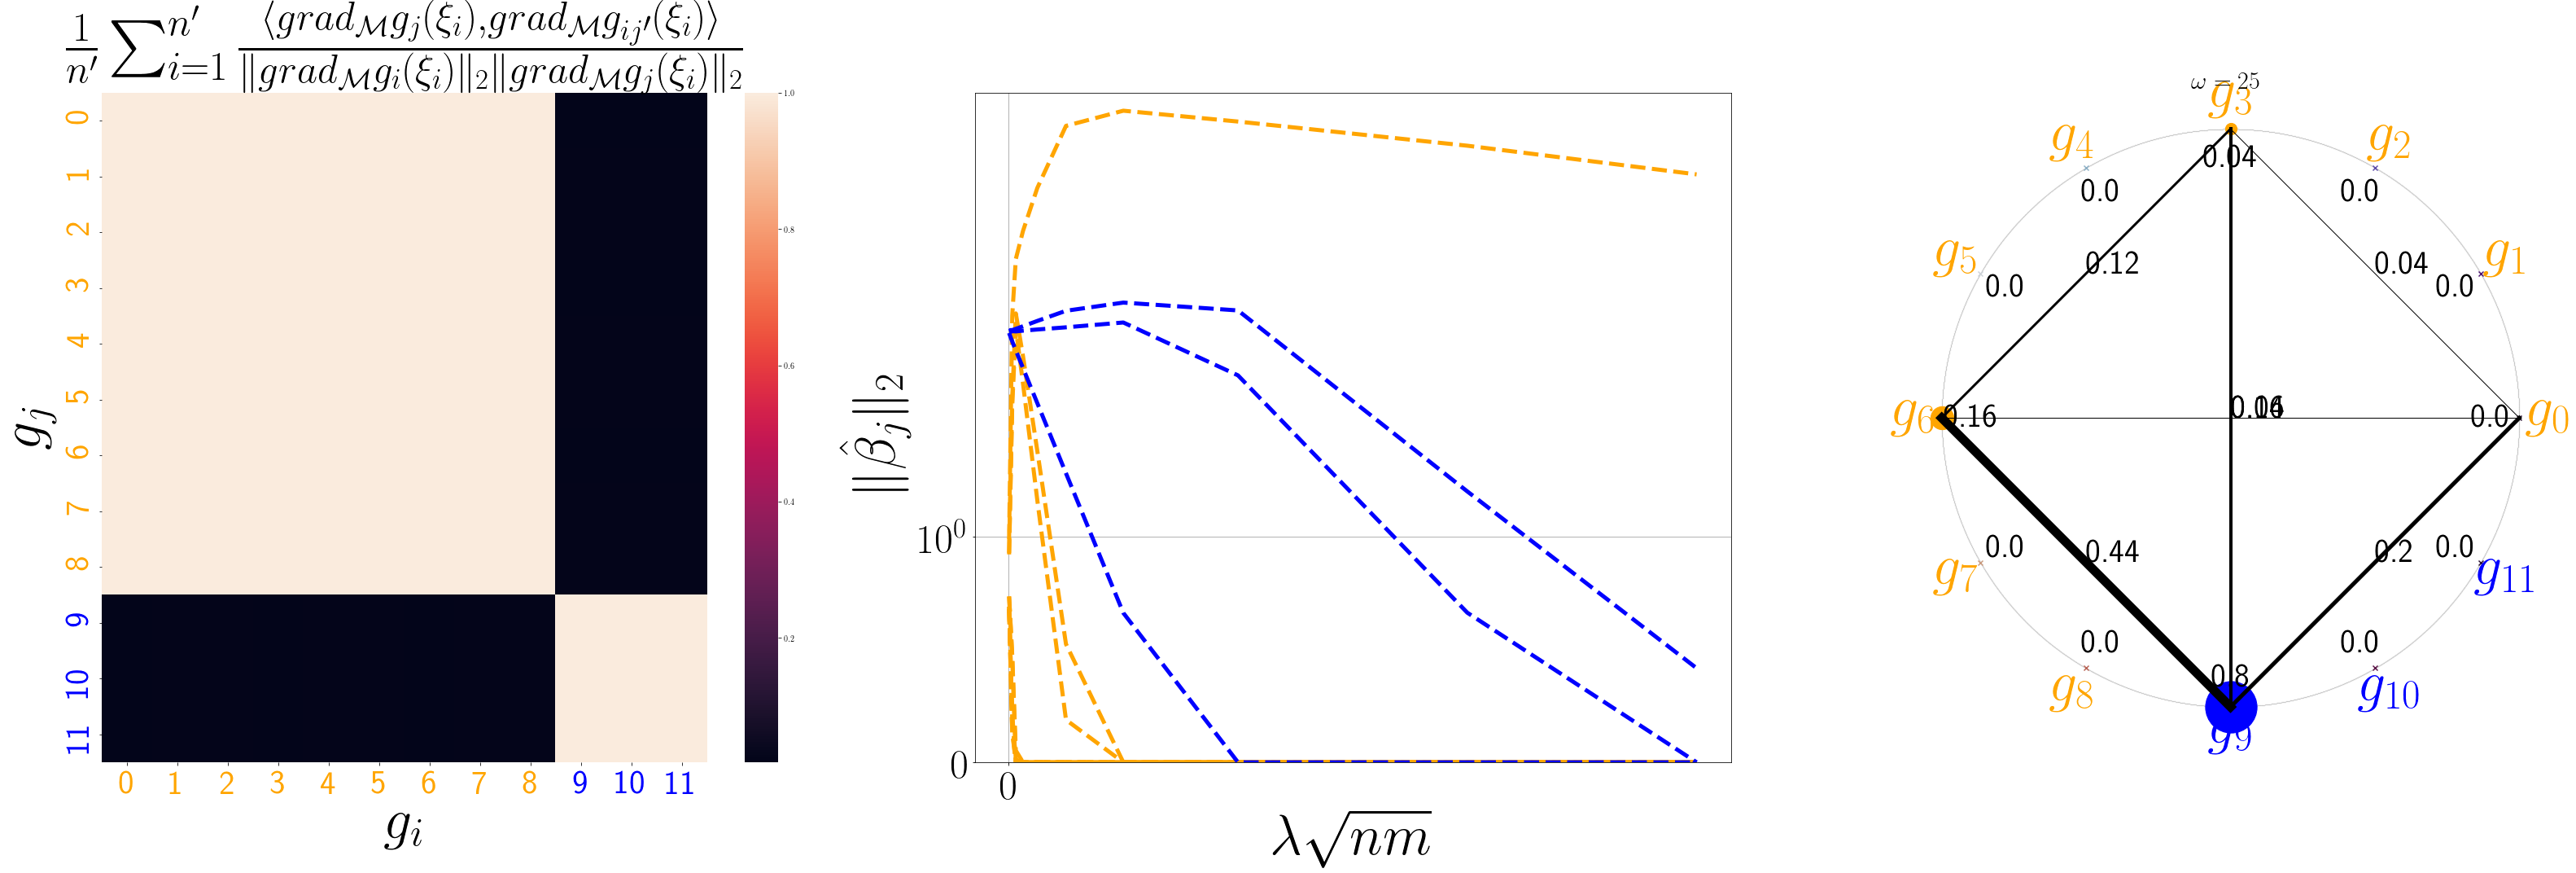

In [215]:
%matplotlib inline
#fig,axes == plt.subplot(3,3,figsize=(15,15))
fig, axes_all = plt.subplots(1,3,figsize=(45,15))

reth_cosine = get_cosines(replicates_rigidethanol[1].dg_M)
#sns.heatmap(eth_cosine, ax = axes_all[0,0],)
colors = np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
plot_cosines(reth_cosine, axes_all[0], colors)
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[1], replicates_rigidethanol[1].coeffs, replicates_rigidethanol[1].lambdas_plot * np.sqrt(3 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_rigidethanol, 12, axes_all[2],colors)

fig.tight_layout()
plt.savefig('bigwan_re')

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


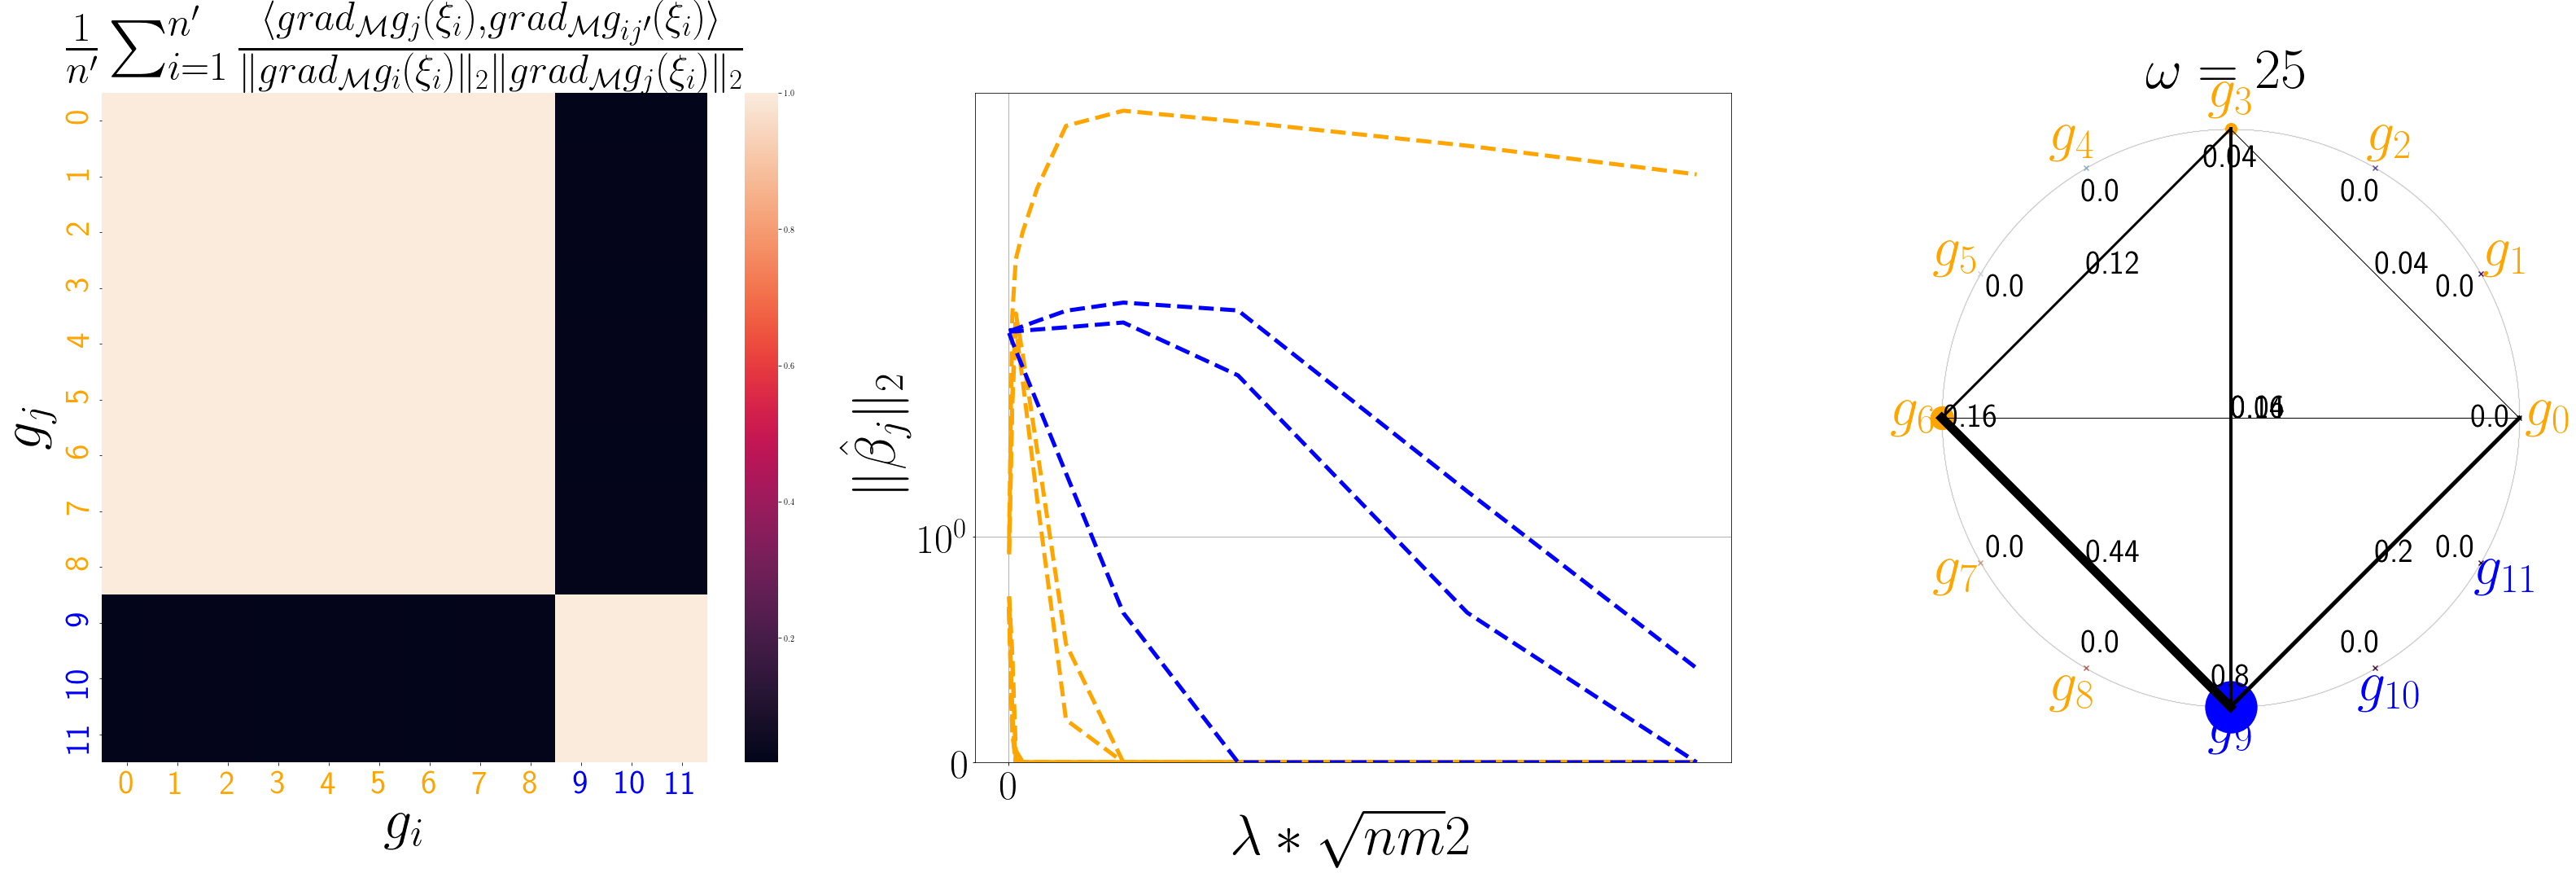

In [174]:
%matplotlib inline
#fig,axes == plt.subplot(3,3,figsize=(15,15))
fig, axes_all = plt.subplots(1,3,figsize=(45,15))

reth_cosine = get_cosines(replicates_rigidethanol[1].dg_M)
#sns.heatmap(eth_cosine, ax = axes_all[0,0],)
colors = np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
plot_cosines(reth_cosine, axes_all[0], colors)
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[1], replicates_rigidethanol[1].coeffs, replicates_rigidethanol[1].lambdas_plot * np.sqrt(3 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_rigidethanol, 12, axes_all[2],colors)

fig.tight_layout()
plt.savefig('bigwan_re')

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004
1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004
1.0 0.0
0.9781476007338057 0.20791169081775931
0.9135454576426009 0.40673664307580015
0.8090169943749475 0.5877852522924731
0.6691306063588583 0.7431448254773941
0.5000000000000001 0.86602540378

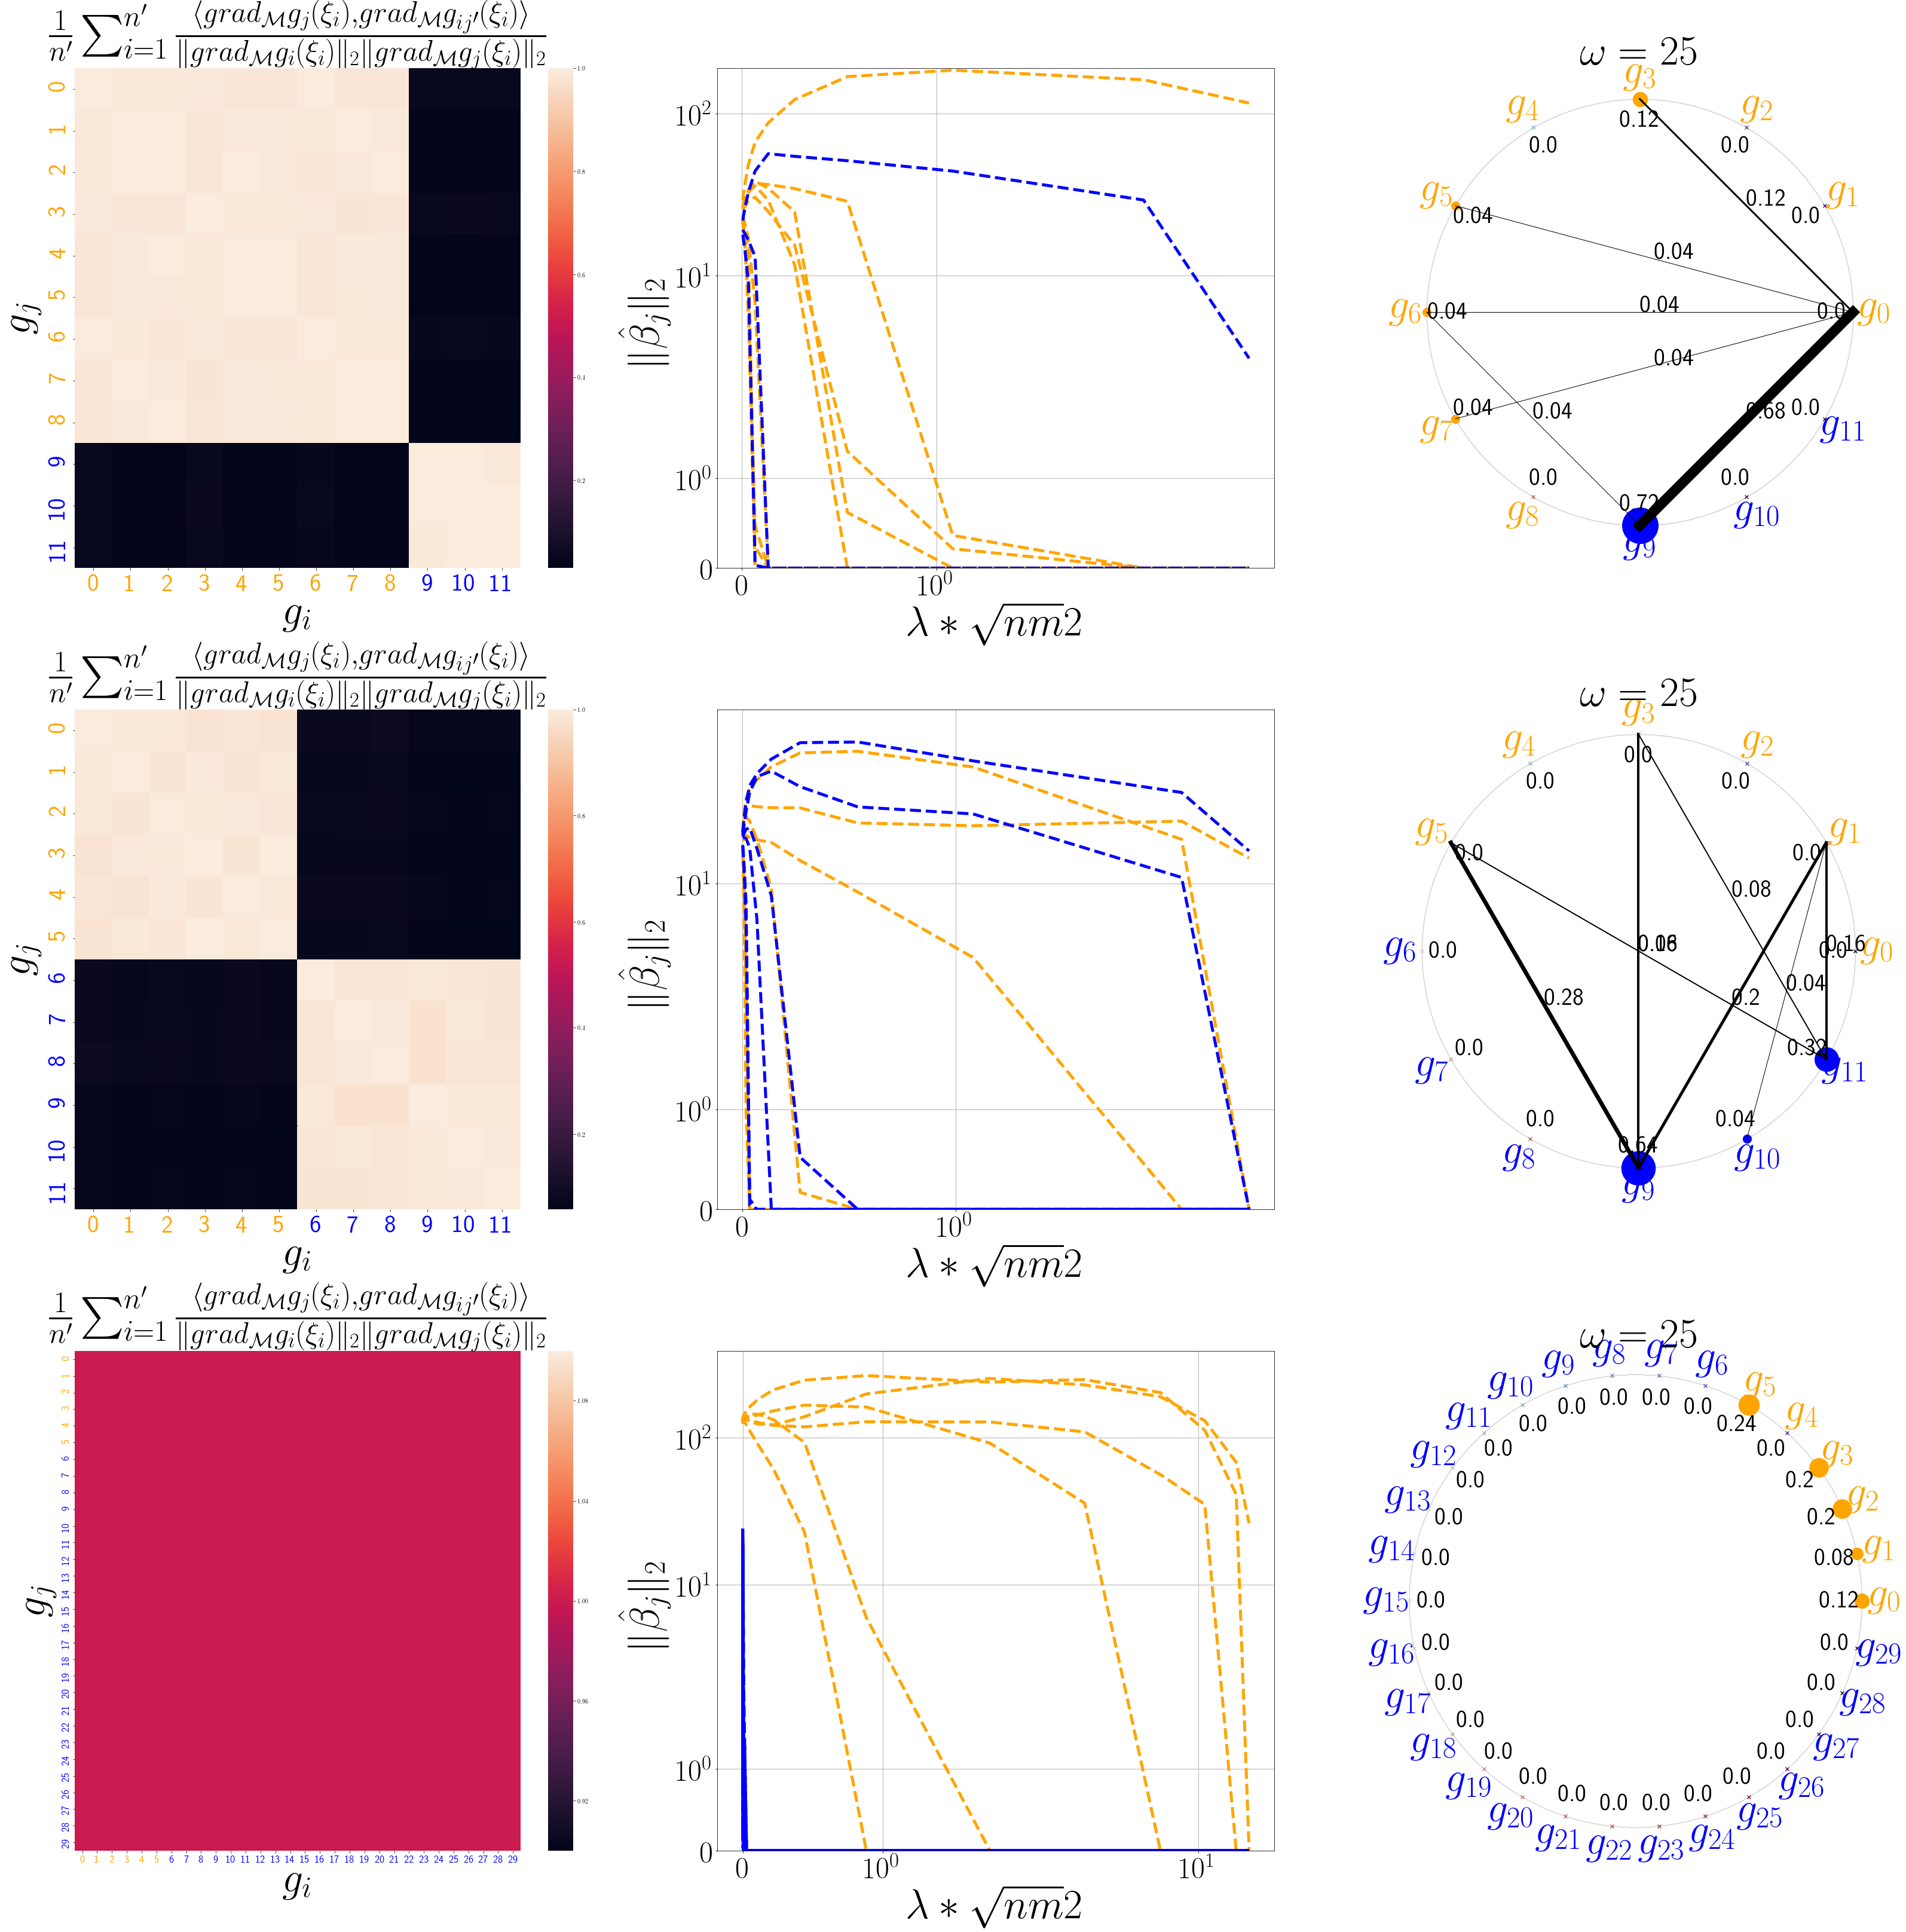

In [171]:
%matplotlib inline
#fig,axes == plt.subplot(3,3,figsize=(15,15))
fig, axes_all = plt.subplots(3,3,figsize=(45,45))

eth_cosine = get_cosines(replicates_ethanol[1].dg_M)
#sns.heatmap(eth_cosine, ax = axes_all[0,0],)
colors = np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
plot_cosines(eth_cosine, axes_all[0,0], colors)
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[0,1], replicates_ethanol[1].coeffs, replicates_ethanol[1].lambdas_plot * np.sqrt(3 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_ethanol, 12, axes_all[0,2],colors)

mal_cosine = get_cosines(replicates_malonaldehyde[0].dg_M)
#sns.heatmap(mal_cosine, ax = axes_all[1,0])
colors = np.hstack([np.repeat('orange',6), np.repeat('blue',6)])
plot_cosines(mal_cosine, axes_all[1,0], colors)
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[1,1], replicates_malonaldehyde[0].coeffs, replicates_malonaldehyde[0].lambdas_plot * np.sqrt(3 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_malonaldehyde, 12, axes_all[1,2],colors)

tol_cosine = get_cosines(replicates_toluene[2].dg_M)
#sns.heatmap(tol_cosine, ax = axes_all[2,0])
colors = np.hstack([np.repeat('orange',6), np.repeat('blue',24)])
plot_cosines(tol_cosine, axes_all[2,0], colors)

#fig, axes_all = plt.subplots(figsize=(15,15))
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[2,1], replicates_toluene[2].coeffs, replicates_toluene[2].lambdas_plot * np.sqrt(2 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_toluene, 30, axes_all[2,2],colors)

fig.tight_layout()
plt.savefig('bigwan')

In [27]:

def plot_reg_path_ax_lambdasearch_customcolors2(axes, coeffs, xaxis,fig, colors):
    p = coeffs.shape[3]
    q = coeffs.shape[1]
    gnames = np.asarray(list(range(p)), dtype=str)

    rcParams['axes.titlesize'] = 30
    plt.rc('text', usetex=True)

    normax = np.sqrt(np.sum(np.sum(np.sum(coeffs ** 2, axis=1), axis=1), axis=1).max())

    for k in range(q):
        for j in range(p):
            toplot = np.linalg.norm(coeffs[:, k, :, j], axis=1)
            w = .15
            widths = np.asarray([width(xaxis[i], w) for i in range(len(xaxis))])
            # axes[k+1].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
            axes[k + 1].plot(xaxis, toplot, 'go--', linewidth=5, markersize=0, alpha=1.,
                             color=colors[j], label=gnames[j])
    for j in range(p):
        toplot = np.linalg.norm(np.linalg.norm(coeffs[:, :, :, j], axis=2), axis=1)
        # axes[0].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
        axes[0].plot(xaxis, toplot, 'go--', linewidth=5, markersize=0, alpha=1.,
                     color=colors[j], label=gnames[j])

    kkk = xaxis.copy()
    kkk.sort()

    for k in range(1 + q):
        axes[k].tick_params(labelsize=50)
        axes[k].set_xscale('symlog')
        axes[k].set_yscale('symlog')
        axes[k].set_ylim(bottom=0, top=normax)
        # axes[k].set_xlim(left = 0, right = xaxis[xupperindex])
        if (k == 0):
            tixx = np.hstack(
                [np.asarray([0]), 10 ** np.linspace(math.floor(np.log10(normax)), math.floor(np.log10(normax)) + 1, 2)])
        if k != 0:
            # axes[k].set_yticks(tixx)
            axes[k].set_yticklabels([])
        if k != q:
            axes[k+1].set_title(r"$\phi_{{{}}}$".format(k+1), fontsize = 50)
            #axes[k + 1].set_title(r"$\phi_{{{}}}$.format(k)")
        if k == 0:
            axes[k].set_title("Combined", fontdict={'fontsize': 50})
    for k in range(1 + q):
        axes[k].grid(True, which="both", alpha=True)
        axes[k].set_xlabel(r"$\lambda$", fontsize = 50)
        
    axes[0].set_ylabel(r"$\|\beta\|$", fontsize = 50)
        
    handles, labels = axes[0].get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    # fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=50)
    # fig.text(0.05, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=60)
    #fig.subplots_adjust(right=0.75)
    #leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
    #leg_ax.axis('off')
    #leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200 / p})
    # leg.set_title('Torsion', prop={'size': Function})
    for l in leg.get_lines():
        l.set_alpha(1)
    # fig.savefig(filename + 'beta_paths_n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(
    #    nreps))



In [62]:
m = 3
nsel = 100
nreps = 5
p = 12
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm

viridis = cm.get_cmap('viridis', p)
#print('viridis(range(12))', viridis(range(25)))
figname = ('ethanol_replicates_fig')
fig, axes_all = plt.subplots(nreps, m+1,figsize=(15,5*nreps) )#15*nreps))
colors = viridis(range(p))#np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
for r in range(nreps):
    print(r)
    plot_reg_path_ax_lambdasearch_customcolors(axes_all[r], replicates_ethanol[r].coeffs, replicates_ethanol[r].lambdas_plot * np.sqrt(m * nsel), fig,colors)
    for k in range(m+1):
        #axes_all[r,k].set_ylabel("", fontsize = 70)
        axes_all[r,k].set_xlabel("", fontsize = 70)
        
for k in range(m+1):
    axes_all[r,k].set_xlabel(r"$\lambda$", fontsize = 30)
handles, labels = axes_all[0,0].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.tight_layout()
fig.subplots_adjust(right=0.75)
leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
gnames = np.asarray(list(range(p)), dtype=str)
leg_ax.axis('off')
leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200 / p})
leg.set_title(r"$g_j$")
leg.get_title().set_fontsize('60')#, prop={'size': Function})
#
plt.savefig('ethanol_replicates', bbox_inches = "tight")

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0
1


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


2
3


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


4


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [63]:
m = 3
nsel = 100
nreps = 5
p = 12
replicates = replicates_malonaldehyde
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm

viridis = cm.get_cmap('viridis', p)
#print('viridis(range(12))', viridis(range(25)))
figname = ('mal_replicates_fig')
fig, axes_all = plt.subplots(nreps, m+1,figsize=(15,5*nreps) )#15*nreps))
colors = viridis(range(p))#np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
for r in range(nreps):
    print(r)
    plot_reg_path_ax_lambdasearch_customcolors(axes_all[r], replicates[r].coeffs, replicates[r].lambdas_plot * np.sqrt(m * nsel), fig,colors)
    for k in range(m+1):
        #axes_all[r,k].set_ylabel("", fontsize = 70)
        axes_all[r,k].set_xlabel("", fontsize = 70)
        
for k in range(m+1):
    axes_all[r,k].set_xlabel(r"$\lambda$", fontsize = 30)
handles, labels = axes_all[0,0].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.tight_layout()
fig.subplots_adjust(right=0.75)
leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
gnames = np.asarray(list(range(p)), dtype=str)
leg_ax.axis('off')
leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200 / p})
leg.set_title(r"$g_j$")
leg.get_title().set_fontsize('60')#, prop={'size': Function})
#
plt.savefig('malonaldehyde_replicates', bbox_inches = "tight")

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0
1


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


2
3


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


4


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [64]:
m = 2
nsel = 100
nreps = 5
p = 30
replicates = replicates_toluene
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm

viridis = cm.get_cmap('viridis', p)
#print('viridis(range(12))', viridis(range(25)))
figname = ('mal_replicates_fig')
fig, axes_all = plt.subplots(nreps, m+1,figsize=(15,5*nreps) )#15*nreps))
colors = viridis(range(p))#np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
for r in range(nreps):
    print(r)
    plot_reg_path_ax_lambdasearch_customcolors(axes_all[r], replicates[r].coeffs, replicates[r].lambdas_plot * np.sqrt(m * nsel), fig,colors)
    for k in range(m+1):
        #axes_all[r,k].set_ylabel("", fontsize = 70)
        axes_all[r,k].set_xlabel("", fontsize = 70)
        
for k in range(m+1):
    axes_all[r,k].set_xlabel(r"$\lambda$", fontsize = 30)
handles, labels = axes_all[0,0].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.tight_layout()
fig.subplots_adjust(right=0.75)
leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
gnames = np.asarray(list(range(p)), dtype=str)
leg_ax.axis('off')
leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200 / p})
leg.set_title(r"$g_j$")
leg.get_title().set_fontsize('60')#, prop={'size': Function})
#
plt.savefig('toluene_replicates', bbox_inches = "tight")

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0
1
2


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


3
4


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [39]:
# m = 3
# nsel = 100
# nreps = 25
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# from matplotlib import cm

# viridis = cm.get_cmap('viridis', nreps)
# #print('viridis(range(12))', viridis(range(25)))
# figname = ('ethanol_replicates_fig')
# fig, axes_all = plt.subplots(nreps, m+1,figsize=(2*nreps,5) )#15*nreps))
# colors = viridis(range(25))#np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
# for r in range(nreps):
#     print(r)
#     plot_reg_path_ax_lambdasearch_customcolors(axes_all[r], replicates_ethanol[r].coeffs, replicates_ethanol[r].lambdas_plot * np.sqrt(m * nsel), fig,colors)
#     for k in range(m+1):
#         #axes_all[r,k].set_ylabel("", fontsize = 70)
#         axes_all[r,k].set_xlabel("", fontsize = 70)
    
# fig.tight_layout()

# plt.savefig('ethanol_replicates', bbox_inches = "tight")

0
1


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


2
3


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


4
5


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


6
7


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


8
9


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


10
11


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


12
13


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


14
15


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


16
17


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


18
19


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


20
21


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


22
23


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


24


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004
1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004
1.0 0.0
0.9781476007338057 0.20791169081775931
0.9135454576426009 0.40673664307580015
0.8090169943749475 0.5877852522924731
0.6691306063588583 0.7431448254773941
0.5000000000000001 0.86602540378

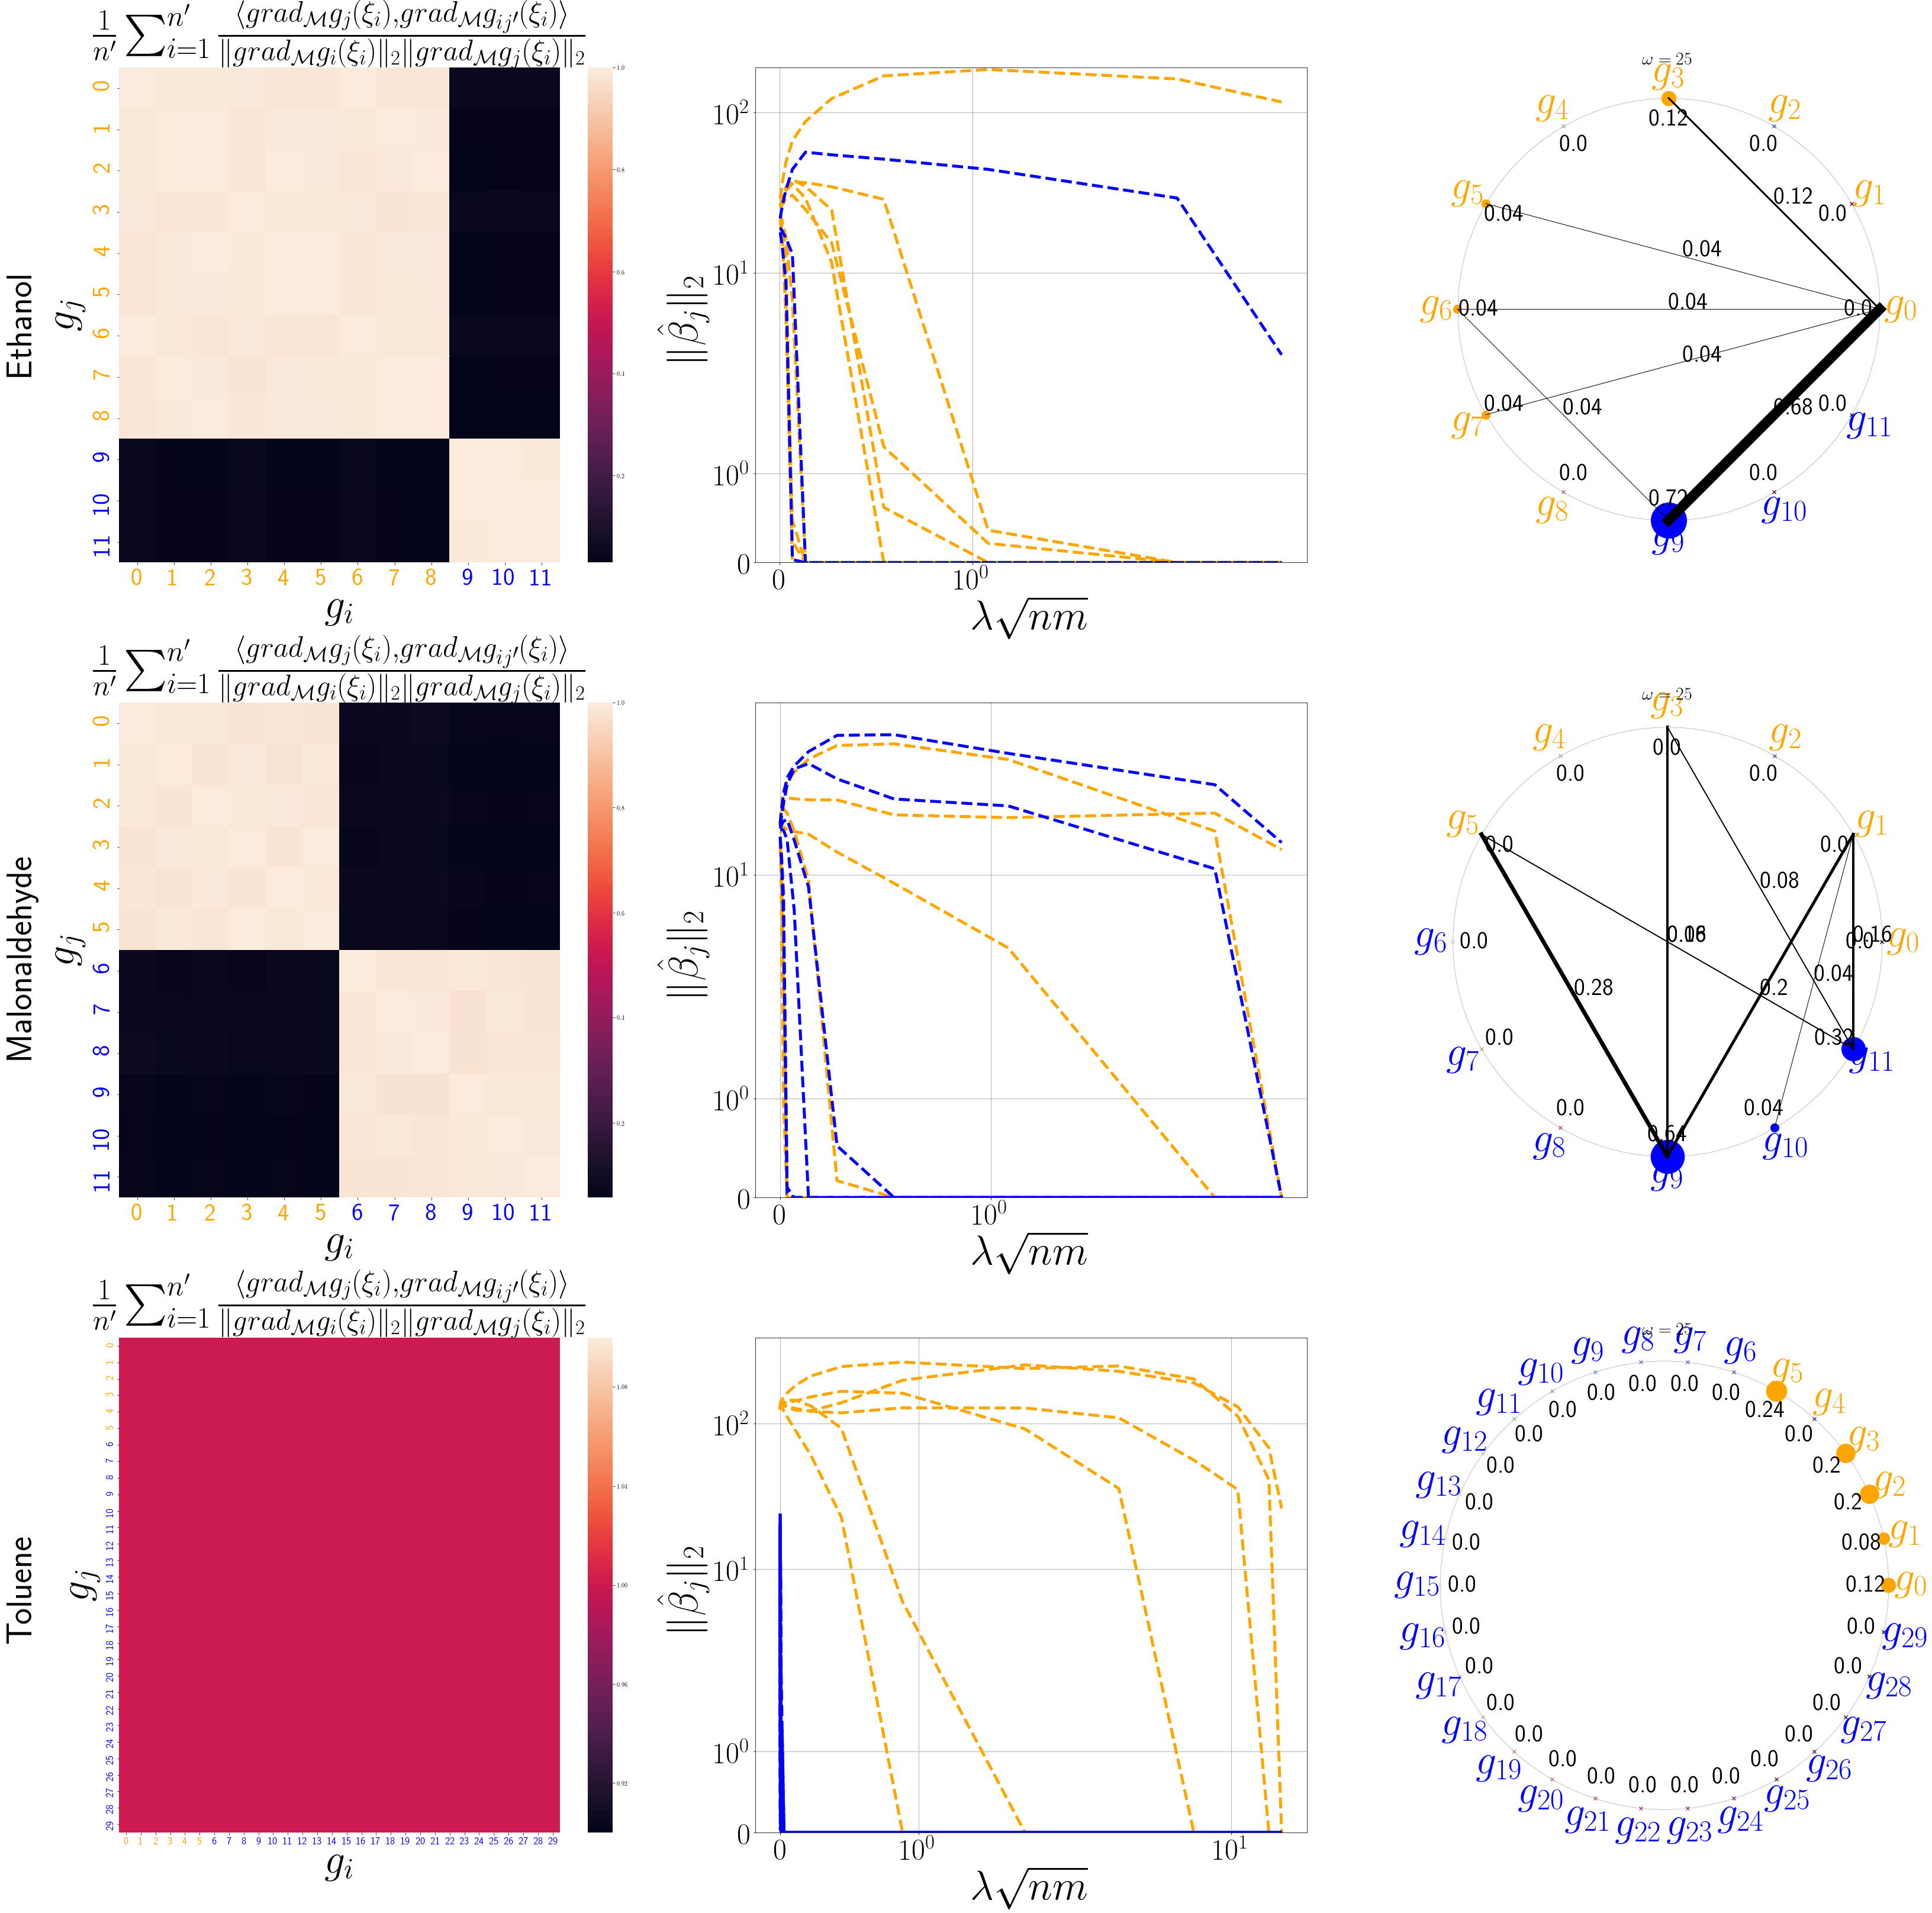

In [216]:
%matplotlib inline
#fig,axes == plt.subplot(3,3,figsize=(15,15))
fig, axes_all = plt.subplots(3,3,figsize=(45,45))

eth_cosine = get_cosines(replicates_ethanol[1].dg_M)
#sns.heatmap(eth_cosine, ax = axes_all[0,0],)
colors = np.hstack([np.repeat('orange',9), np.repeat('blue',3)])
plot_cosines(eth_cosine, axes_all[0,0], colors)
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[0,1], replicates_ethanol[1].coeffs, replicates_ethanol[1].lambdas_plot * np.sqrt(3 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_ethanol, 12, axes_all[0,2],colors)

mal_cosine = get_cosines(replicates_malonaldehyde[0].dg_M)
#sns.heatmap(mal_cosine, ax = axes_all[1,0])
colors = np.hstack([np.repeat('orange',6), np.repeat('blue',6)])
plot_cosines(mal_cosine, axes_all[1,0], colors)
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[1,1], replicates_malonaldehyde[0].coeffs, replicates_malonaldehyde[0].lambdas_plot * np.sqrt(3 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_malonaldehyde, 12, axes_all[1,2],colors)

tol_cosine = get_cosines(replicates_toluene[2].dg_M)
#sns.heatmap(tol_cosine, ax = axes_all[2,0])
colors = np.hstack([np.repeat('orange',6), np.repeat('blue',24)])
plot_cosines(tol_cosine, axes_all[2,0], colors)

#fig, axes_all = plt.subplots(figsize=(15,15))
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all[2,1], replicates_toluene[2].coeffs, replicates_toluene[2].lambdas_plot * np.sqrt(2 * 100), fig,colors)#axes_all[0].imshow(asdf)
plot_watch_custom(toplot_toluene, 30, axes_all[2,2],colors)
fig.text(-0.01, 0.17, 'Toluene', ha='center', va='center', rotation='vertical', fontsize = 60)
fig.text(-0.01, 0.83, 'Ethanol', ha='center', va='center', rotation='vertical', fontsize = 60)
fig.text(-0.01, 0.5, 'Malonaldehyde', ha='center', va='center', rotation='vertical', fontsize = 60)

fig.tight_layout()
fig.savefig('bigwan3', bbox_inches = "tight")

In [ ]:
def get_cosines(dg):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]

    coses = np.zeros((n, p, p))
    for i in range(n):
        for j in range(p):
            for k in range(p):
                coses[i, j, k] = cosine_similarity(dg[i, j, :], dg[i, k,
                                                                :])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    # cos_summary = np.abs(coses).sum(axis = 0) / n
    cos_summary = np.sum(coses ** 2, axis=0) / n
    return (cos_summary)

In [209]:
dg = replicates_toluene[2].dg_M

In [211]:
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]

    coses = np.zeros((n, p, p))
    for i in range(n):
        for j in range(p):
            for k in range(p):
                coses[i, j, k] = cosine_similarity(dg[i, j, :], dg[i, k,
                                                                :])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]


In [212]:
dg[i, j, :]

array([-0.00999068])

In [207]:
get_cosines(replicates_toluene[2].dg_M)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1

In [191]:
from IPython.display import display, Math, Latex
import seaborn as sns

In [189]:
def plot_cosines(cosines, ax, colors):
    p = cosines.shape[0]
    sns.heatmap(cosines ,ax = ax)
    for xtick, color in zip(ax.get_xticklabels(), colors):
        xtick.set_color(color)
    for ytick, color in zip(ax.get_yticklabels(), colors):
        ytick.set_color(color)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 500 / p)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 500 / p)
    
    ax.set_ylabel(r"$g_j$", fontsize = 70)
    ax.set_xlabel(r"$g_i$", fontsize = 70)
    #ax.set_title(r"$\text{hi}$")
    ax.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{ij'} (\xi_i)\rangle}{\|grad_{\mathcal M} g_i (\xi_i) \|_2 \| grad_{\mathcal M} g_j(\xi_i) \|_2} $",
                fontsize = 70)

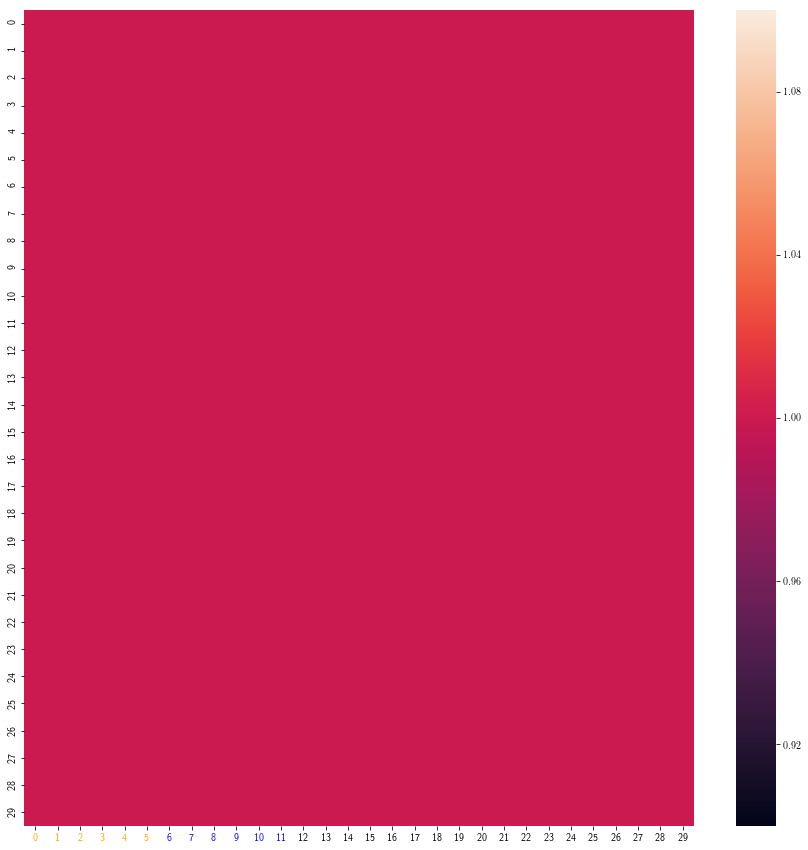

In [116]:


#fig,axes == plt.subplot(3,3,figsize=(15,15))
fig, axes_all = plt.subplots(figsize=(15,15))
sns.heatmap(tol_cosine ,ax = axes_all)
#.set_yticklabels(list(range(30)), colors = colors)


In [90]:
toplot_toluene.shape

(30,)

In [ ]:
ax.set_ylabel('')    
ax.set_xlabel('')


In [72]:
import math
from collections import OrderedDict

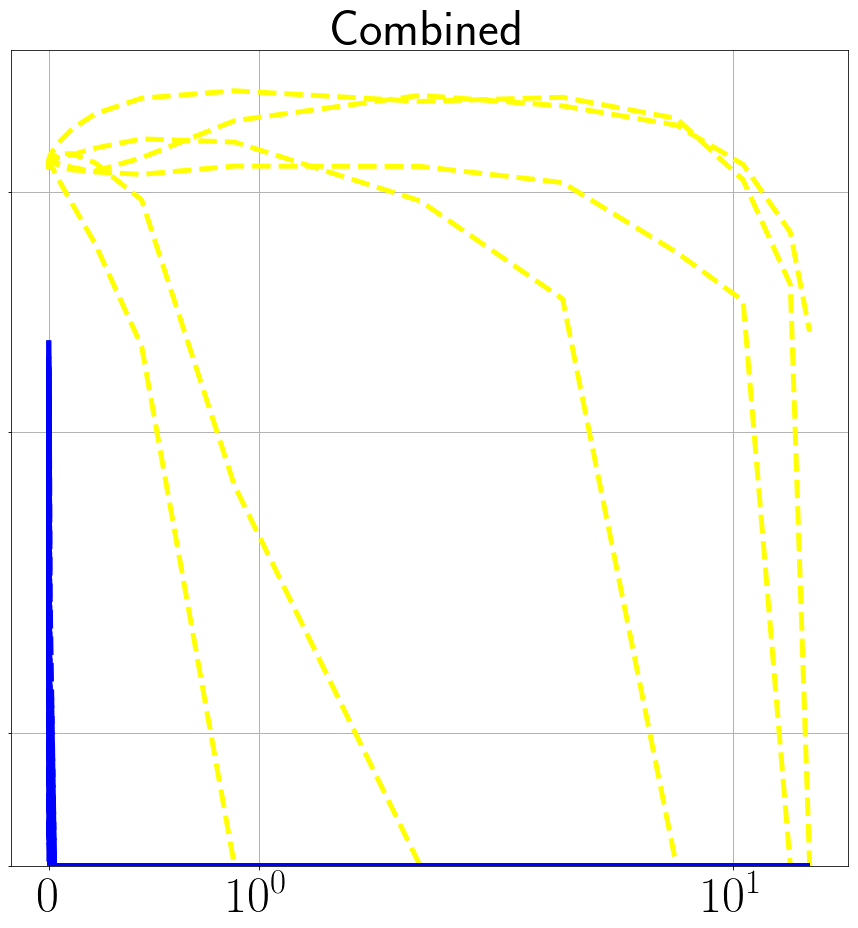

In [76]:
fig, axes_all = plt.subplots(figsize=(15,15))
plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all, replicates_toluene[2].coeffs, replicates_toluene[2].lambdas_plot * np.sqrt(2 * 100), fig,colors)

In [51]:
replicates_toluene[2].dg_M

array([[[-0.038547  ],
        [ 0.04660775],
        [ 0.03800737],
        ...,
        [ 0.00109982],
        [-0.00164593],
        [-0.00361722]],

       [[ 0.03721229],
        [ 0.03414262],
        [-0.04253029],
        ...,
        [ 0.00589545],
        [ 0.00024892],
        [ 0.01104717]],

       [[ 0.04142791],
        [-0.03168913],
        [-0.03895353],
        ...,
        [ 0.0009522 ],
        [ 0.00058877],
        [ 0.00508796]],

       ...,

       [[ 0.04076466],
        [-0.0417382 ],
        [ 0.02911868],
        ...,
        [ 0.0023406 ],
        [-0.00209048],
        [ 0.00605616]],

       [[ 0.03771557],
        [ 0.03058507],
        [-0.03915161],
        ...,
        [ 0.00312685],
        [ 0.0004363 ],
        [-0.00956966]],

       [[-0.02939932],
        [-0.03574017],
        [ 0.04259356],
        ...,
        [-0.00077851],
        [ 0.00362572],
        [-0.00999068]]])

In [27]:
import seaborn as sns

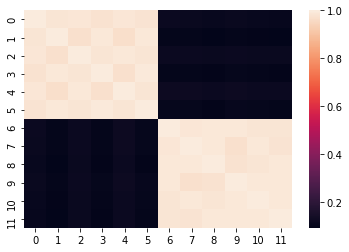

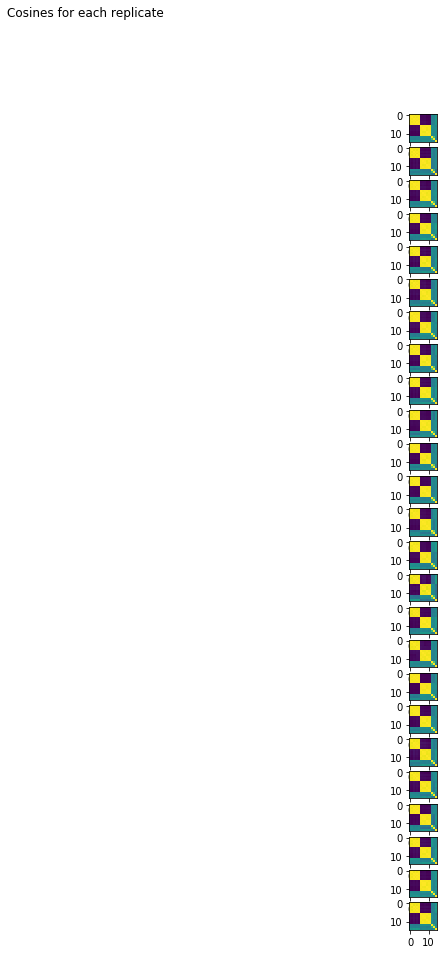

In [42]:
%matplotlib inline
fig, axes_all = plt.subplots(nreps,figsize=(15*nreps,15))
fig.suptitle('Cosines for each replicate')
for i in range(nreps):
    full = np.concatenate([replicates_malonaldehyde[i].dg_M, np.swapaxes(replicates_malonaldehyde[i].df_M,1,2)],1)
    asdf = get_cosines(full)
    #print(asdf)
    axes_all[i].imshow(asdf)

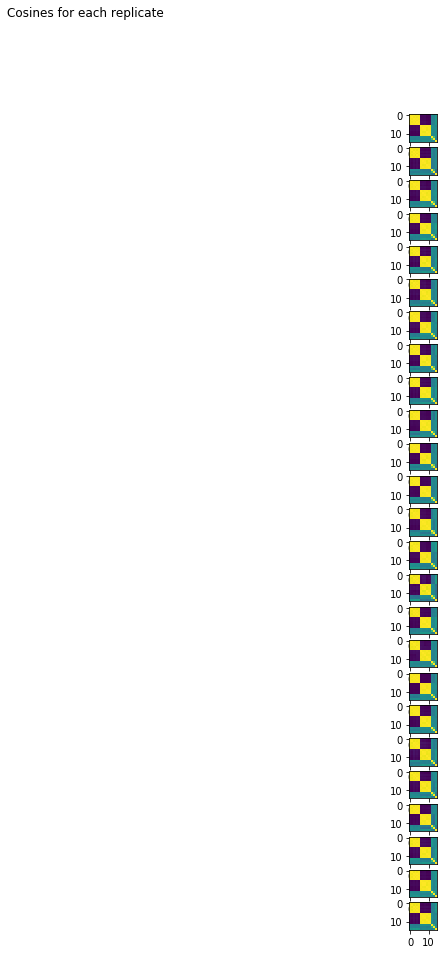

In [21]:
%matplotlib inline
fig, axes_all = plt.subplots(nreps,figsize=(15*nreps,15))
fig.suptitle('Cosines for each replicate')
for i in range(nreps):
    full = np.concatenate([replicates_malonaldehyde[i].dg_M, np.swapaxes(replicates_malonaldehyde[i].df_M,1,2)],1)
    asdf = get_cosines(full)
    #print(asdf)
    axes_all[i].imshow(asdf)

In [129]:
angles = np.linspace(0,2*np.pi, 10000)

In [130]:
ys  = np.sin(angles)
xs  = np.cos(angles)

In [204]:
i = 1000
nebs = np.asarray(np.linspace(900,1100,201), int)
data = np.asarray([xs,ys]).transpose()

In [270]:
tan = np.asarray([[-np.sin(angles[i]) , np.cos(angles[i])]])

In [248]:
angles[i]

0.6283813688548442

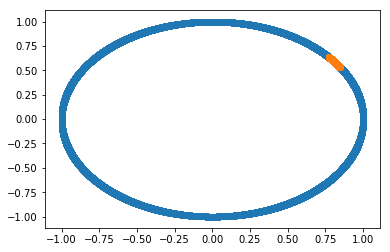

In [251]:
plt.scatter(xs, ys)
plt.scatter(xs[nebs], ys[nebs])
#plt.arrow(xs[i],ys[i],xs[i] + tan[0] ,ys[i] + tan[1])

In [282]:
tan @ tan.transpose() @ data

ValueError: shapes (1,1) and (10000,2) not aligned: 1 (dim 1) != 10000 (dim 0)

In [286]:
data @ tan.transpose() @ tan

array([[ 0.34555127, -0.47554767],
       [ 0.34525237, -0.47513634],
       [ 0.34495334, -0.47472481],
       ...,
       [ 0.34614864, -0.47636978],
       [ 0.34585002, -0.47595882],
       [ 0.34555127, -0.47554767]])

In [288]:
np.linalg.svd(tan.transpose() @ tan)

(array([[-0.58783609,  0.80898006],
        [ 0.80898006,  0.58783609]]),
 array([1.0000000e+00, 6.5262916e-17]),
 array([[-0.58783609,  0.80898006],
        [ 0.80898006,  0.58783609]]))

In [278]:
asdf = tan.transpose() @ tan

In [277]:
 tan @ tan.transpose()

array([[1.]])

In [276]:
tan.transpose() @ tan

array([[ 0.34555127, -0.47554767],
       [-0.47554767,  0.65444873]])

In [290]:
pm = tan.transpose() @ tan#np.outer(tan, tan)

In [297]:
pd = (data[nebs] - data[i]) @ pm

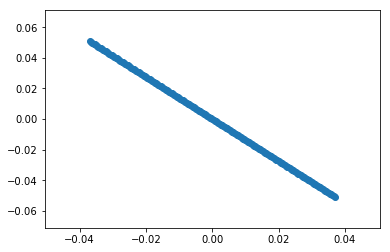

In [298]:
plt.scatter(pd[:,0], pd[:,1])

In [299]:
import scipy.stats

In [300]:
x = np.expand_dims(angles[nebs],1) - angles[i]
y = pd

(x.transpose() @ x)**(-1) @ x.transpose() @ y

array([[-0.58760169,  0.80865748]])

In [301]:
x = np.expand_dims(angles[nebs],1) - angles[i]
y = data[nebs] - data[i]

(x.transpose() @ x)**(-1) @ x.transpose() @ y

array([[-0.58760169,  0.80865748]])

In [304]:
x = 15*np.cos(angles)
y = np.sin(angles)

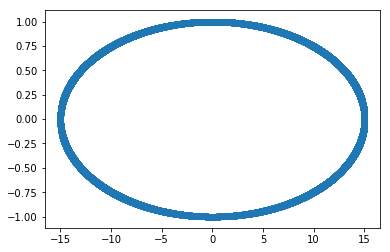

In [305]:
plt.scatter(x,y)

In [306]:
i = 5000
nebs = np.asarray(np.linspace(4900,5100,201), int)
data = np.asarray([xs,ys]).transpose()

In [307]:
tan = np.asarray([[-15*np.sin(angles[i]) , np.cos(angles[i])]])

In [308]:
pm = tan.transpose() @ tan#np.outer(tan, tan)

In [309]:
pd = (data[nebs] - data[i]) @ pm

In [310]:
x = np.expand_dims(angles[nebs],1) - angles[i]
y = pd

(x.transpose() @ x)**(-1) @ x.transpose() @ y

array([[ 0.00471099, -0.99960259]])

In [311]:
x = np.expand_dims(angles[nebs],1) - angles[i]
y = data[nebs] - data[i]

(x.transpose() @ x)**(-1) @ x.transpose() @ y

array([[ 3.14065398e-04, -9.99601209e-01]])

In [166]:
angles[nebs].shape

(201,)

In [157]:
angles

array([0.00000000e+00, 6.28381369e-04, 1.25676274e-03, ...,
       6.28192854e+00, 6.28255693e+00, 6.28318531e+00])

In [ ]:
np.dot(data, )

In [137]:
nebs

array([ 900,  901,  902,  903,  904,  905,  906,  907,  908,  909,  910,
        911,  912,  913,  914,  915,  916,  917,  918,  919,  920,  921,
        922,  923,  924,  925,  926,  927,  928,  929,  930,  931,  932,
        933,  934,  935,  936,  937,  938,  939,  940,  941,  942,  943,
        944,  945,  946,  947,  948,  949,  950,  951,  952,  953,  954,
        955,  956,  957,  958,  959,  960,  961,  962,  963,  964,  965,
        966,  967,  968,  969,  970,  971,  972,  973,  974,  975,  976,
        977,  978,  979,  980,  981,  982,  983,  984,  985,  986,  987,
        988,  989,  990,  991,  992,  993,  994,  995,  996,  997,  998,
        999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
       1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020,
       1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031,
       1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042,
       1043, 1044, 1045, 1046, 1047, 1048, 1049, 10

In [95]:
to_plot = toplot_toluene
p = 30

1.0 0.0
0.9781476007338057 0.20791169081775931
0.9135454576426009 0.40673664307580015
0.8090169943749475 0.5877852522924731
0.6691306063588583 0.7431448254773941
0.5000000000000001 0.8660254037844386
0.30901699437494745 0.9510565162951535
0.10452846326765367 0.9945218953682733
-0.10452846326765333 0.9945218953682734
-0.30901699437494734 0.9510565162951536
-0.4999999999999998 0.8660254037844388
-0.6691306063588579 0.7431448254773945
-0.8090169943749473 0.5877852522924732
-0.9135454576426008 0.40673664307580043
-0.9781476007338056 0.20791169081775973
-1.0 1.2246467991473532e-16
-0.9781476007338057 -0.20791169081775907
-0.9135454576426011 -0.4067366430757998
-0.8090169943749475 -0.587785252292473
-0.6691306063588585 -0.743144825477394
-0.5000000000000004 -0.8660254037844384
-0.30901699437494756 -0.9510565162951535
-0.10452846326765423 -0.9945218953682733
0.104528463267653 -0.9945218953682734
0.30901699437494723 -0.9510565162951536
0.4999999999999993 -0.866025403784439
0.6691306063588578 -

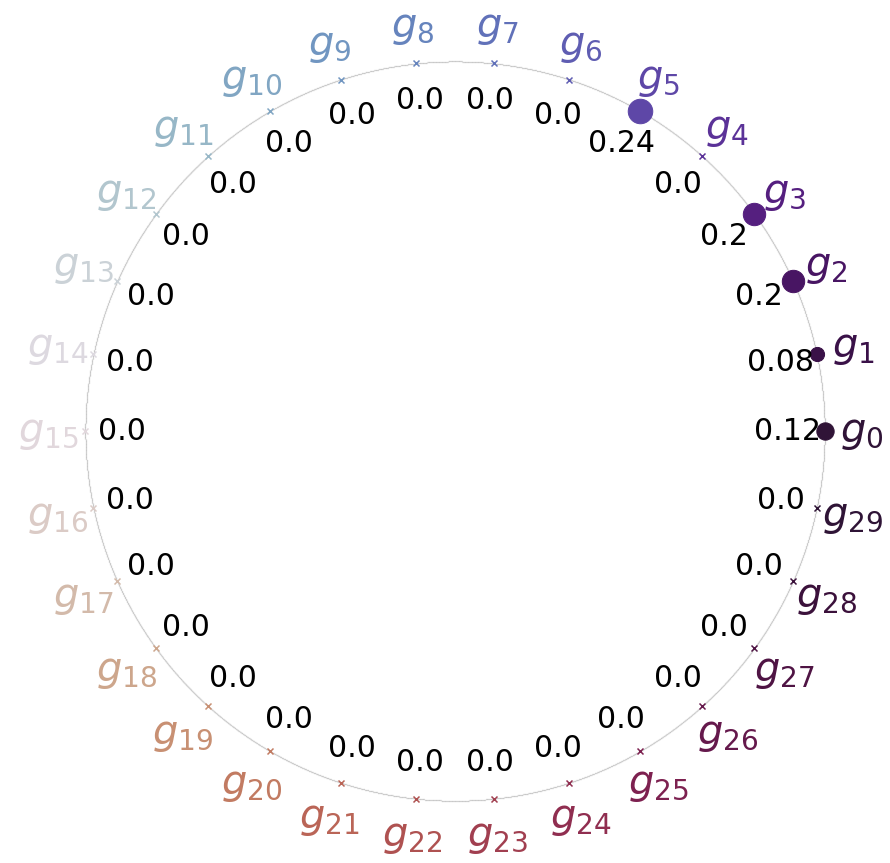

In [100]:
    %matplotlib inline
    
    #fig, ax = plt.subplots(figsize = (15,15))
    theta = np.linspace(0, 2*np.pi, 10000)
    cmap = plt.get_cmap('twilight_shifted',p)
    
    angles = np.linspace(0, 2*np.pi, p+1)
    
    radius = 1.

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)

    figure, axes = plt.subplots(figsize = (15,15))

    #axes.plot(a, b, color= 'gray')
    axes.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

    #for i in range(to_plot.shape)
    if len(to_plot.shape) > 1:
        totes = np.sum(to_plot, axis = 0)
    else:
        totes = to_plot
        
    for j in range(p):
        print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
        axes.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
        axes.text( x = 1.1*np.cos(angles[j]),
                  y = 1.1*np.sin(angles[j]),
                  s = r"$g_{{{}}}$".format(j),color=cmap.colors[j],
                  fontdict = {'fontsize' : 40},
                  horizontalalignment='center',
         verticalalignment='center')



        axes.text( x = .9*np.cos(angles[j]),y = .9*np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 30},
                  horizontalalignment='center',
         verticalalignment='center')



    for j in range(p):
        axes.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'o', s = 100*totes[j] )

    if len(to_plot.shape) > 1:
        for i in range(p):
            for j in range(p):

                #point1 = [1, 2]
                #point2 = [3, 4]

                x_values = [np.cos(angles[j]), np.cos(angles[i])]
                #gather x-values

                y_values = [np.sin(angles[j]), np.sin(angles[i])]
                #gather y-values

                plt.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

                if to_plot[i,j] > 0 :
                    axes.text( x = np.mean(x_values),
                      y = np.mean(y_values),
                      s = str(to_plot[i,j] / nreps),
                      fontdict = {'fontsize' : 20})#,
                  #horizontalalignment='left',
                # verticalalignment='bottom')

                #axes.axline((x1, y1), (x2, y2))
    axes.set_aspect(1)
    axes.set_axis_off()

In [92]:
totes

21.0

In [93]:
to_plot.shape

(30,)

In [1]:
import itertools

In [8]:
np.asarray(list(itertools.permutations(list(range(9)), 4))).shape

(3024, 4)

In [6]:
import numpy as np

In [9]:
9**4

6561

In [10]:
np.asarray(list(itertools.permutations(list(range(4)), 4))).shape

(24, 4)

In [11]:
np.asarray(list(itertools.permutations(list(range(4)), 4)))

array([[0, 1, 2, 3],
       [0, 1, 3, 2],
       [0, 2, 1, 3],
       [0, 2, 3, 1],
       [0, 3, 1, 2],
       [0, 3, 2, 1],
       [1, 0, 2, 3],
       [1, 0, 3, 2],
       [1, 2, 0, 3],
       [1, 2, 3, 0],
       [1, 3, 0, 2],
       [1, 3, 2, 0],
       [2, 0, 1, 3],
       [2, 0, 3, 1],
       [2, 1, 0, 3],
       [2, 1, 3, 0],
       [2, 3, 0, 1],
       [2, 3, 1, 0],
       [3, 0, 1, 2],
       [3, 0, 2, 1],
       [3, 1, 0, 2],
       [3, 1, 2, 0],
       [3, 2, 0, 1],
       [3, 2, 1, 0]])

In [14]:
np.asarray(list(itertools.combinations(list(range(5)), 4)))

array([[0, 1, 2, 3],
       [0, 1, 2, 4],
       [0, 1, 3, 4],
       [0, 2, 3, 4],
       [1, 2, 3, 4]])

In [42]:
combos = np.asarray(list(itertools.combinations(list(range(5)), 4)))

In [48]:
def get_all_atoms_4(natoms):
    combos = np.asarray(list(itertools.combinations(list(range(natoms)), 4)))
    nc = combos.shape[0]
    tor_mat = np.zeros((nc,6,4), dtype = int)
    for c in range(nc):
        tor_mat[c] = np.asarray([combos[c][[0,1,2,3]],
                     combos[c][[1,0,2,3]],
                     #combos[c][[0,2,1,3]],
                     combos[c][[3,1,0,2]],
                    combos[0][[2,1,3,0]],
                    #combos[0][[1,2,3,0]],
                     combos[0][[0,3,2,1]],
                     combos[0][[1,0,3,2]]])
    output = np.reshape(tor_mat, (nc * 6, 4))
    return(output, output.shape[0])

In [43]:
combos[0][[1,0,2,3]]

array([1, 0, 2, 3])

In [44]:
nc = combos.shape[0]

In [45]:
tor_mat = np.zeros((nc,6,4), dtype = int)
for c in range(nc):
    tor_mat[c] = np.asarray([combos[c][[0,1,2,3]],
                 combos[c][[1,0,2,3]],
                 #combos[c][[0,2,1,3]],
                 combos[c][[3,1,0,2]],
                combos[0][[2,1,3,0]],
                #combos[0][[1,2,3,0]],
                 combos[0][[0,3,2,1]],
                 combos[0][[1,0,3,2]]])
                #]]])
#tors = tors   

In [47]:
np.reshape(tor_mat, (nc * 6, 4))

array([[0, 1, 2, 3],
       [1, 0, 2, 3],
       [3, 1, 0, 2],
       [2, 1, 3, 0],
       [0, 3, 2, 1],
       [1, 0, 3, 2],
       [0, 1, 2, 4],
       [1, 0, 2, 4],
       [4, 1, 0, 2],
       [2, 1, 3, 0],
       [0, 3, 2, 1],
       [1, 0, 3, 2],
       [0, 1, 3, 4],
       [1, 0, 3, 4],
       [4, 1, 0, 3],
       [2, 1, 3, 0],
       [0, 3, 2, 1],
       [1, 0, 3, 2],
       [0, 2, 3, 4],
       [2, 0, 3, 4],
       [4, 2, 0, 3],
       [2, 1, 3, 0],
       [0, 3, 2, 1],
       [1, 0, 3, 2],
       [1, 2, 3, 4],
       [2, 1, 3, 4],
       [4, 2, 1, 3],
       [2, 1, 3, 0],
       [0, 3, 2, 1],
       [1, 0, 3, 2]])

In [35]:
tors

array([[0.0e+000, 4.9e-324, 9.9e-324, 1.5e-323],
       [0.0e+000, 1.0e+000, 2.0e+000, 3.0e+000],
       [1.0e+000, 0.0e+000, 2.0e+000, 3.0e+000],
       [3.0e+000, 1.0e+000, 0.0e+000, 2.0e+000],
       [2.0e+000, 1.0e+000, 3.0e+000, 0.0e+000],
       [0.0e+000, 3.0e+000, 2.0e+000, 1.0e+000],
       [1.0e+000, 0.0e+000, 3.0e+000, 2.0e+000]])

In [27]:
combos[c]

IndexError: index 1 is out of bounds for axis 0 with size 1